<a href="https://colab.research.google.com/github/HansAzharr/ML-Material-Screening/blob/main/06_Literature_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import os
import joblib
import pandas as pd
import numpy as np
import random

from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

## Load Data

In [ ]:
# Define paths to saved model, scaler, and data

# Define paths for loading the newly trained models and data with selected features
models_selected_features_folder = '/content/drive/MyDrive/Colab Notebooks/Masters Research Project/Model_Selected_Features'
data_selected_features_folder = '/content/drive/MyDrive/Colab Notebooks/Masters Research Project/Data/Training_Data_Selected_Features'

# Define filenames for the newly trained models
xgb_model_sf_filename = os.path.join(models_selected_features_folder, "xgboost_selected_features_model_v2.joblib")
rf_model_sf_filename = os.path.join(models_selected_features_folder, "random_forest_selected_features_model_v2.joblib")
lgbm_model_sf_filename = os.path.join(models_selected_features_folder, "lightgbm_selected_features_model_v2.joblib")

# Define filenames for the data with selected features
# Note: These filenames include the model name as the features are model-specific
xgb_X_train_sf_filename = os.path.join(data_selected_features_folder, "X_train_scaled_xgboost_features_with_formula_v2.csv")
xgb_X_test_sf_filename = os.path.join(data_selected_features_folder, "X_test_scaled_xgboost_features_with_formula_v2.csv")

rf_X_train_sf_filename = os.path.join(data_selected_features_folder, "X_train_scaled_random_forest_features_with_formula_v2.csv")
rf_X_test_sf_filename = os.path.join(data_selected_features_folder, "X_test_scaled_random_forest_features_with_formula_v2.csv")

lgbm_X_train_sf_filename = os.path.join(data_selected_features_folder, "X_train_scaled_lightgbm_features_with_formula_v2.csv")
lgbm_X_test_sf_filename = os.path.join(data_selected_features_folder, "X_test_scaled_lightgbm_features_with_formula_v2.csv")

# Y_train and Y_test are the same for all models with selected features
y_train_sf_filename = os.path.join(data_selected_features_folder, "Y_train_v2.csv")
y_test_sf_filename = os.path.join(data_selected_features_folder, "Y_test_v2.csv")

# Define scaler and feature names filenames
scaler_filename = os.path.join(models_selected_features_folder, "scaler_X_v2.joblib")
feature_names_filename = os.path.join(models_selected_features_folder, "top_features_per_model_v2.joblib")

In [ ]:
# Load Model, Scaler, and Feature Names


try:
    # Load all three models
    loaded_xgboost_model = joblib.load(xgb_model_sf_filename) # XGBoost model
    loaded_random_forest_model = joblib.load(rf_model_sf_filename) # Random Forest model
    loaded_lightgbm_model = joblib.load(lgbm_model_sf_filename) # LightGBM model


    loaded_scaler_X = joblib.load(scaler_filename)
    loaded_feature_names = joblib.load(feature_names_filename)
    print("Models, scaler, and feature names loaded successfully.")
    print(f"Type of loaded XGBoost model: {type(loaded_xgboost_model)}")
    print(f"Type of loaded Random Forest model: {type(loaded_random_forest_model)}")
    print(f"Type of loaded LightGBM model: {type(loaded_lightgbm_model)}")
    print(f"Type of loaded scaler: {type(loaded_scaler_X)}")

    # Inspect loaded_feature_names
    print("\n--- Inspection of loaded_feature_names ---")
    print(f"Type of loaded_feature_names: {type(loaded_feature_names)}")
    print(f"Number of feature sets loaded: {len(loaded_feature_names)}")

    # Iterate through each model's feature list in the dictionary
    for model_name, feature_list in loaded_feature_names.items():
        if isinstance(feature_list, list):
            print(f"\n--- {model_name} Features ---")
            print(f"Number of features: {len(feature_list)}")
            print(f"First 5 feature names: {feature_list[:5]}")
            print(f"Last 5 feature names: {feature_list[-5:]}")
        else:
            print(f"\nWarning: Value for key '{model_name}' in loaded_feature_names is not a list.")


except Exception as e:
    print(f"Error loading models, scaler, or feature names: {e}")
    sys.exit("Exiting due to critical loading error.") # Exit if these critical components can't be loaded

Models, scaler, and feature names loaded successfully.
Type of loaded XGBoost model: <class 'sklearn.multioutput.MultiOutputRegressor'>
Type of loaded Random Forest model: <class 'sklearn.multioutput.MultiOutputRegressor'>
Type of loaded LightGBM model: <class 'sklearn.multioutput.MultiOutputRegressor'>
Type of loaded scaler: <class 'sklearn.preprocessing._data.StandardScaler'>

--- Inspection of loaded_feature_names ---
Type of loaded_feature_names: <class 'dict'>
Number of feature sets loaded: 3

--- XGBoost Features ---
Number of features: 20
First 5 feature names: ['theo_energy_vol', 'max_electronegativity', 'exp_energy_vol', 'crystal_system_Hexagonal', 'theoretical_False']
Last 5 feature names: ['nelements', 'max_covalent_radius', 'is_metal_False', 'stability_discharge', 'avg_atomic_mass']

--- Random Forest Features ---
Number of features: 20
First 5 feature names: ['energy_grav', 'max_electronegativity', 'energy_vol', 'stability_discharge', 'theo_energy_vol']
Last 5 feature name

In [ ]:
#  Define Target KPIs
target_kpis = ['theoretical_capacity_grav', 'average_voltage', 'energy_above_hull']
print(f"\nTarget KPIs for analysis: {target_kpis}")

# Define filenames for the test data with selected features for each model
# Y_test is the same for all selected feature datasets.

# Load the Test Data (X_test_scaled for each model and Y_test)
print("\n--- Loading Test Data (with selected features for each model) ---")

# Dictionary to store the loaded X_test DataFrames for each model
X_test_loaded_dfs_sf = {}

try:
    # Load Y_test once, as it's the same for all selected feature datasets
    Y_test_loaded_df_sf = pd.read_csv(y_test_sf_filename, index_col=0)
    print(f"Y_test data loaded successfully from {y_test_sf_filename}")
    print(f"Shape of loaded Y_test_loaded_df_sf: {Y_test_loaded_df_sf.shape}")

    # Load X_test for XGBoost
    print(f"\nLoading X_test for XGBoost from {xgb_X_test_sf_filename}")
    xgb_X_test_loaded_df_sf = pd.read_csv(xgb_X_test_sf_filename, index_col=0)
    X_test_loaded_dfs_sf['XGBoost'] = xgb_X_test_loaded_df_sf
    print(f"Shape of loaded xgb_X_test_loaded_df_sf: {xgb_X_test_loaded_df_sf.shape}")


    # Load X_test for Random Forest
    print(f"\nLoading X_test for Random Forest from {rf_X_test_sf_filename}")
    rf_X_test_loaded_df_sf = pd.read_csv(rf_X_test_sf_filename, index_col=0)
    X_test_loaded_dfs_sf['Random Forest'] = rf_X_test_loaded_df_sf
    print(f"Shape of loaded rf_X_test_loaded_df_sf: {rf_X_test_loaded_df_sf.shape}")


    # Load X_test for LightGBM
    print(f"\nLoading X_test for LightGBM from {lgbm_X_test_sf_filename}")
    lgbm_X_test_loaded_df_sf = pd.read_csv(lgbm_X_test_sf_filename, index_col=0)
    X_test_loaded_dfs_sf['LightGBM'] = lgbm_X_test_loaded_df_sf
    print(f"Shape of loaded lgbm_X_test_loaded_df_sf: {lgbm_X_test_loaded_df_sf.shape}")


    print("\nAll test data (with selected features) loaded successfully.")

    X_test_loaded_df_full = xgb_X_test_loaded_df_sf # Assign one for backward compatibility
    Y_test_loaded_df = Y_test_loaded_df_sf # Y_test is the same for all


except FileNotFoundError as e:
    print(f"Error loading one or more test data files with selected features: {e}")
    print("Please ensure all specified X_test and Y_test files exist in the correct locations.")
except Exception as e:
    print(f"An unexpected error occurred during data loading: {e}")


Target KPIs for analysis: ['theoretical_capacity_grav', 'average_voltage', 'energy_above_hull']

--- Loading Test Data (with selected features for each model) ---
Y_test data loaded successfully from /content/drive/MyDrive/Colab Notebooks/Masters Research Project/Data/Training_Data_Selected_Features/Y_test_v2.csv
Shape of loaded Y_test_loaded_df_sf: (689, 3)

Loading X_test for XGBoost from /content/drive/MyDrive/Colab Notebooks/Masters Research Project/Data/Training_Data_Selected_Features/X_test_scaled_xgboost_features_with_formula_v2.csv
Shape of loaded xgb_X_test_loaded_df_sf: (689, 21)

Loading X_test for Random Forest from /content/drive/MyDrive/Colab Notebooks/Masters Research Project/Data/Training_Data_Selected_Features/X_test_scaled_random_forest_features_with_formula_v2.csv
Shape of loaded rf_X_test_loaded_df_sf: (689, 21)

Loading X_test for LightGBM from /content/drive/MyDrive/Colab Notebooks/Masters Research Project/Data/Training_Data_Selected_Features/X_test_scaled_lightg

In [ ]:
# Inspect loaded dataframes
print("\n--- Inspecting Loaded Test DataFrames ---")

# Inspect Y_test
print(f"\nY_test_loaded_df_sf shape: {Y_test_loaded_df_sf.shape}")
print(f"Y_test_loaded_df_sf columns: {Y_test_loaded_df_sf.columns.tolist()}")

# Inspect X_test for each model
for model_name, df in X_test_loaded_dfs_sf.items():
    print(f"\n{model_name} X_test_loaded_df_sf shape: {df.shape}")
    print(f"{model_name} X_test_loaded_df_sf columns: {df.columns.tolist()}")


--- Inspecting Loaded Test DataFrames ---

Y_test_loaded_df_sf shape: (689, 3)
Y_test_loaded_df_sf columns: ['theoretical_capacity_grav', 'average_voltage', 'energy_above_hull']

XGBoost X_test_loaded_df_sf shape: (689, 21)
XGBoost X_test_loaded_df_sf columns: ['theo_energy_vol', 'max_electronegativity', 'exp_energy_vol', 'crystal_system_Hexagonal', 'theoretical_False', 'atomic_weight_ion', 'energy_grav', 'ionic_radius_ion', 'avg_atomic_number', 'energy_vol', 'min_atomic_number', 'min_covalent_radius', 'crystal_system_Cubic', 'min_electronegativity', 'max_atomic_mass', 'nelements', 'max_covalent_radius', 'is_metal_False', 'stability_discharge', 'avg_atomic_mass', 'formula_pretty']

Random Forest X_test_loaded_df_sf shape: (689, 21)
Random Forest X_test_loaded_df_sf columns: ['energy_grav', 'max_electronegativity', 'energy_vol', 'stability_discharge', 'theo_energy_vol', 'exp_energy_vol', 'crystal_system_Hexagonal', 'avg_electronegativity', 'volume', 'density', 'e_fermi', 'total_magneti

## Create combined dataframe

In [ ]:
# Make predictions for all materials using all models, include formula_pretty and actual values
print("\n--- Making Predictions and Combining with Actual Values ---")

# Dictionary to store combined actual and predicted values for each model
combined_results = {}

# Iterate through each model and its corresponding features to make predictions and combine results
for model_name, feature_list in loaded_feature_names.items():
    print(f"\nProcessing results for {model_name} model...")

    # Get the list of features for the current model
    model_features = loaded_feature_names[model_name]

    # Select the appropriate loaded model and test data
    if model_name == 'XGBoost':
        model = loaded_xgboost_model
        X_test_data = X_test_loaded_dfs_sf['XGBoost']
    elif model_name == 'Random Forest':
        model = loaded_random_forest_model
        X_test_data = X_test_loaded_dfs_sf['Random Forest']
    elif model_name == 'LightGBM':
        model = loaded_lightgbm_model
        X_test_data = X_test_loaded_dfs_sf['LightGBM']
    else:
        print(f"Warning: No loaded model found for '{model_name}'. Skipping processing for this model.")
        continue

    # Ensure the test data has the same columns as the features expected by the model, including 'formula_pretty'
    if not set(model_features).issubset(X_test_data.columns):
         print(f"Error: Test data for {model_name} is missing some required features.")
         print(f"Missing features: {list(set(model_features) - set(X_test_data.columns))}")
         combined_results[model_name] = None
         continue

    # Make predictions
    try:
        y_pred = model.predict(X_test_data[model_features]) # Select only the required features for prediction
        pred_df = pd.DataFrame(y_pred, columns=target_kpis, index=X_test_data.index)
        print(f"Predictions made successfully for {model_name} on test data.")
    except Exception as e:
        print(f"Error making predictions with {model_name} on test data: {e}")
        combined_results[model_name] = None
        continue

    # Get the actual values for the target KPIs from Y_test_loaded_df_sf
    actual_df = Y_test_loaded_df_sf[target_kpis]

    # Combine actual values, predicted values, and formula_pretty
    combined_df = actual_df.copy()

    # Rename predicted columns for clarity
    renamed_pred_df = pred_df.rename(columns={kpi: f"{kpi}_pred" for kpi in target_kpis})

    # Merge with combined_df
    combined_df = combined_df.merge(renamed_pred_df, left_index=True, right_index=True, how='left')

    # Add formula_pretty from X_test_data
    combined_df['formula_pretty'] = X_test_data['formula_pretty']

    # Reorder columns to place 'formula_pretty' after the index
    cols = combined_df.columns.tolist()
    cols.insert(0, cols.pop(cols.index('formula_pretty'))) # Move 'formula_pretty' to the first position (after index)
    combined_df = combined_df[cols]


    combined_results[model_name] = combined_df
    print(f"Combined results created for {model_name}.")
    print(f"Shape of combined results for {model_name}: {combined_results[model_name].shape}")

# Display the first few rows of combined results for each model
print("\n--- Sample Combined Results (Actual vs Predicted) ---")
for model_name, result_df in combined_results.items():
    if result_df is not None:
        print(f"\nCombined Results for {model_name}:")
        display(result_df.head())


--- Making Predictions and Combining with Actual Values ---

Processing results for XGBoost model...
Predictions made successfully for XGBoost on test data.
Combined results created for XGBoost.
Shape of combined results for XGBoost: (689, 7)

Processing results for Random Forest model...
Predictions made successfully for Random Forest on test data.
Combined results created for Random Forest.
Shape of combined results for Random Forest: (689, 7)

Processing results for LightGBM model...
Predictions made successfully for LightGBM on test data.
Combined results created for LightGBM.
Shape of combined results for LightGBM: (689, 7)

--- Sample Combined Results (Actual vs Predicted) ---

Combined Results for XGBoost:


formula_pretty  theoretical_capacity_grav  average_voltage  \
2466     Li2(NiO2)5                 315.937843         2.588103   
1923    Sr2Ti6N2O11                  39.800842         0.455458   
3127       LiMnP2O7                 110.401669         3.038464   
2689   Li2MnV(PO4)3                 128.065906         2.895618   
3155    Li4V5Cr3O16                 218.461781         1.075329   

      energy_above_hull  theoretical_capacity_grav_pred  average_voltage_pred  \
2466           0.062887                      234.815277              3.440274   
1923           0.030885                       49.820583              0.356021   
3127           0.017045                      105.152077              3.908637   
2689           0.011854                      110.649147              3.100577   
3155           0.027895                      159.731888              2.224306   

      energy_above_hull_pred  
2466                0.099096  
1923                0.033008  
3127                0.051374  
2689                0.029272  
3155                0.044071


Combined Results for Random Forest:


formula_pretty  theoretical_capacity_grav  average_voltage  \
2466     Li2(NiO2)5                 315.937843         2.588103   
1923    Sr2Ti6N2O11                  39.800842         0.455458   
3127       LiMnP2O7                 110.401669         3.038464   
2689   Li2MnV(PO4)3                 128.065906         2.895618   
3155    Li4V5Cr3O16                 218.461781         1.075329   

      energy_above_hull  theoretical_capacity_grav_pred  average_voltage_pred  \
2466           0.062887                      280.837341              3.253044   
1923           0.030885                       88.624494              0.324706   
3127           0.017045                       91.571736              3.558390   
2689           0.011854                      112.366915              3.317113   
3155           0.027895                      113.643034              1.974297   

      energy_above_hull_pred  
2466                0.078731  
1923                0.055719  
3127                0.061172  
2689                0.065925  
3155                0.076347


Combined Results for LightGBM:


formula_pretty  theoretical_capacity_grav  average_voltage  \
2466     Li2(NiO2)5                 315.937843         2.588103   
1923    Sr2Ti6N2O11                  39.800842         0.455458   
3127       LiMnP2O7                 110.401669         3.038464   
2689   Li2MnV(PO4)3                 128.065906         2.895618   
3155    Li4V5Cr3O16                 218.461781         1.075329   

      energy_above_hull  theoretical_capacity_grav_pred  average_voltage_pred  \
2466           0.062887                      249.174451              4.148571   
1923           0.030885                       91.715214              0.236084   
3127           0.017045                       88.096723              3.721532   
2689           0.011854                      111.858563              2.876364   
3155           0.027895                      180.467667              1.463301   

      energy_above_hull_pred  
2466                0.073538  
1923                0.061030  
3127                0.049207  
2689                0.027246  
3155                0.055472

## Calculate prediction errors

In [ ]:
# Calculate prediction errors
print("\n--- Calculating Prediction Errors (Predicted-Actual, Absolute, Relative) ---")

# Iterate through each model's combined results and calculate errors
for model_name, combined_df in combined_results.items():
    if combined_df is not None:
        print(f"\nProcessing errors and reordering columns for {model_name} model...")

        # Calculate errors
        for kpi in target_kpis:
            actual_col = kpi
            pred_col = f"{kpi}_pred"
            error_col = f"{kpi}_error"
            abs_error_col = f"{kpi}_abs_error"
            relative_error_col = f"{kpi}_relative_error"


            # Calculate the error (predicted - actual)
            combined_df[error_col] = combined_df[pred_col] - combined_df[actual_col]

            # Calculate absolute error
            combined_df[abs_error_col] = abs(combined_df[error_col])

            # Calculate relative error (handle division by zero)
            combined_df[relative_error_col] = np.where(
                combined_df[actual_col] != 0,
                combined_df[abs_error_col] / combined_df[actual_col],
                np.nan # Use NaN where actual value is zero to avoid division by zero
            )


        # Reorder columns
        ordered_cols = ['formula_pretty'] # Start with formula_pretty

        for kpi in target_kpis:
            actual_col = kpi
            pred_col = f"{kpi}_pred"
            error_col = f"{kpi}_error"
            abs_error_col = f"{kpi}_abs_error"
            relative_error_col = f"{kpi}_relative_error"


            # Add actual, predicted, and error columns for the current KPI
            ordered_cols.extend([actual_col, pred_col, error_col, abs_error_col, relative_error_col])

        # Reindex the DataFrame with the new column order
        combined_df = combined_df.reindex(columns=ordered_cols)


        print(f"Errors calculated and columns reordered for {model_name}.")
        print(f"Updated shape of combined results for {model_name}: {combined_df.shape}")

# Display the first few rows of combined results with errors and reordered columns for each model
print("\n--- Sample Combined Results with Errors (Columns Reordered) ---")
for model_name, result_df in combined_results.items():
    if result_df is not None:
        print(f"\nCombined Results for {model_name}:")
        display(result_df.head())


--- Calculating Prediction Errors (Predicted-Actual, Absolute, Relative) ---

Processing errors and reordering columns for XGBoost model...
Errors calculated and columns reordered for XGBoost.
Updated shape of combined results for XGBoost: (689, 16)

Processing errors and reordering columns for Random Forest model...
Errors calculated and columns reordered for Random Forest.
Updated shape of combined results for Random Forest: (689, 16)

Processing errors and reordering columns for LightGBM model...
Errors calculated and columns reordered for LightGBM.
Updated shape of combined results for LightGBM: (689, 16)

--- Sample Combined Results with Errors (Columns Reordered) ---

Combined Results for XGBoost:


formula_pretty  theoretical_capacity_grav  average_voltage  \
2466     Li2(NiO2)5                 315.937843         2.588103   
1923    Sr2Ti6N2O11                  39.800842         0.455458   
3127       LiMnP2O7                 110.401669         3.038464   
2689   Li2MnV(PO4)3                 128.065906         2.895618   
3155    Li4V5Cr3O16                 218.461781         1.075329   

      energy_above_hull  theoretical_capacity_grav_pred  average_voltage_pred  \
2466           0.062887                      234.815277              3.440274   
1923           0.030885                       49.820583              0.356021   
3127           0.017045                      105.152077              3.908637   
2689           0.011854                      110.649147              3.100577   
3155           0.027895                      159.731888              2.224306   

      energy_above_hull_pred  theoretical_capacity_grav_error  \
2466                0.099096                       -81.122566   
1923                0.033008                        10.019741   
3127                0.051374                        -5.249592   
2689                0.029272                       -17.416759   
3155                0.044071                       -58.729893   

      theoretical_capacity_grav_abs_error  \
2466                            81.122566   
1923                            10.019741   
3127                             5.249592   
2689                            17.416759   
3155                            58.729893   

      theoretical_capacity_grav_relative_error  average_voltage_error  \
2466                                  0.256767               0.852170   
1923                                  0.251747              -0.099436   
3127                                  0.047550               0.870173   
2689                                  0.135998               0.204959   
3155                                  0.268834               1.148976   

      average_voltage_abs_error  average_voltage_relative_error  \
2466                   0.852170                        0.329264   
1923                   0.099436                        0.218322   
3127                   0.870173                        0.286386   
2689                   0.204959                        0.070782   
3155                   1.148976                        1.068488   

      energy_above_hull_error  energy_above_hull_abs_error  \
2466                 0.036209                     0.036209   
1923                 0.002123                     0.002123   
3127                 0.034328                     0.034328   
2689                 0.017418                     0.017418   
3155                 0.016175                     0.016175   

      energy_above_hull_relative_error  
2466                          0.575783  
1923                          0.068736  
3127                          2.013924  
2689                          1.469324  
3155                          0.579847


Combined Results for Random Forest:


formula_pretty  theoretical_capacity_grav  average_voltage  \
2466     Li2(NiO2)5                 315.937843         2.588103   
1923    Sr2Ti6N2O11                  39.800842         0.455458   
3127       LiMnP2O7                 110.401669         3.038464   
2689   Li2MnV(PO4)3                 128.065906         2.895618   
3155    Li4V5Cr3O16                 218.461781         1.075329   

      energy_above_hull  theoretical_capacity_grav_pred  average_voltage_pred  \
2466           0.062887                      280.837341              3.253044   
1923           0.030885                       88.624494              0.324706   
3127           0.017045                       91.571736              3.558390   
2689           0.011854                      112.366915              3.317113   
3155           0.027895                      113.643034              1.974297   

      energy_above_hull_pred  theoretical_capacity_grav_error  \
2466                0.078731                       -35.100502   
1923                0.055719                        48.823652   
3127                0.061172                       -18.829934   
2689                0.065925                       -15.698991   
3155                0.076347                      -104.818747   

      theoretical_capacity_grav_abs_error  \
2466                            35.100502   
1923                            48.823652   
3127                            18.829934   
2689                            15.698991   
3155                           104.818747   

      theoretical_capacity_grav_relative_error  average_voltage_error  \
2466                                  0.111099               0.664940   
1923                                  1.226699              -0.130752   
3127                                  0.170558               0.519926   
2689                                  0.122585               0.421495   
3155                                  0.479804               0.898968   

      average_voltage_abs_error  average_voltage_relative_error  \
2466                   0.664940                        0.256922   
1923                   0.130752                        0.287078   
3127                   0.519926                        0.171115   
2689                   0.421495                        0.145563   
3155                   0.898968                        0.835993   

      energy_above_hull_error  energy_above_hull_abs_error  \
2466                 0.015844                     0.015844   
1923                 0.024834                     0.024834   
3127                 0.044127                     0.044127   
2689                 0.054071                     0.054071   
3155                 0.048452                     0.048452   

      energy_above_hull_relative_error  
2466                          0.251947  
1923                          0.804070  
3127                          2.588771  
2689                          4.561368  
3155                          1.736904


Combined Results for LightGBM:


formula_pretty  theoretical_capacity_grav  average_voltage  \
2466     Li2(NiO2)5                 315.937843         2.588103   
1923    Sr2Ti6N2O11                  39.800842         0.455458   
3127       LiMnP2O7                 110.401669         3.038464   
2689   Li2MnV(PO4)3                 128.065906         2.895618   
3155    Li4V5Cr3O16                 218.461781         1.075329   

      energy_above_hull  theoretical_capacity_grav_pred  average_voltage_pred  \
2466           0.062887                      249.174451              4.148571   
1923           0.030885                       91.715214              0.236084   
3127           0.017045                       88.096723              3.721532   
2689           0.011854                      111.858563              2.876364   
3155           0.027895                      180.467667              1.463301   

      energy_above_hull_pred  theoretical_capacity_grav_error  \
2466                0.073538                       -66.763393   
1923                0.061030                        51.914372   
3127                0.049207                       -22.304946   
2689                0.027246                       -16.207343   
3155                0.055472                       -37.994114   

      theoretical_capacity_grav_abs_error  \
2466                            66.763393   
1923                            51.914372   
3127                            22.304946   
2689                            16.207343   
3155                            37.994114   

      theoretical_capacity_grav_relative_error  average_voltage_error  \
2466                                  0.211318               1.560468   
1923                                  1.304354              -0.219374   
3127                                  0.202034               0.683069   
2689                                  0.126555              -0.019255   
3155                                  0.173917               0.387971   

      average_voltage_abs_error  average_voltage_relative_error  \
2466                   1.560468                        0.602939   
1923                   0.219374                        0.481656   
3127                   0.683069                        0.224807   
2689                   0.019255                        0.006650   
3155                   0.387971                        0.360793   

      energy_above_hull_error  energy_above_hull_abs_error  \
2466                 0.010651                     0.010651   
1923                 0.030145                     0.030145   
3127                 0.032162                     0.032162   
2689                 0.015392                     0.015392   
3155                 0.027577                     0.027577   

      energy_above_hull_relative_error  
2466                          0.169368  
1923                          0.976022  
3127                          1.886843  
2689                          1.298459  
3155                          0.988581

In [ ]:
# Rank materials by prediction error for each model (lowest error on top) based on specified error types
print("\n--- Ranking Materials by Prediction Error (Specified Error Types) ---")

# Desired sorting order for error metrics (True for ascending - lowest error is best)
# energy_above_hull: lowest absolute error (True)
# theoretical_capacity_grav: lowest relative error (True)
# average_voltage: lowest relative error (True)
sorting_error_types = {
    'theoretical_capacity_grav': 'relative_error',
    'average_voltage': 'relative_error',
    'energy_above_hull': 'abs_error'
}

# Iterate through each model's combined results and rank materials by error
ranked_materials_by_error = {}

for model_name, combined_df in combined_results.items():
    if combined_df is not None:
        print(f"\nRanking materials by error for {model_name} model...")

        # Create a list of columns to sort by, using the specified error type for each KPI
        sort_cols_error = []
        for kpi in target_kpis:
            error_type = sorting_error_types.get(kpi)
            if error_type:
                error_col_name = f"{kpi}_{error_type}"
                if error_col_name in combined_df.columns:
                    sort_cols_error.append(error_col_name)
                else:
                    print(f"Warning: Error column '{error_col_name}' not found for {model_name}. Skipping this KPI for ranking.")
            else:
                 print(f"Warning: No specified error type for KPI '{kpi}'. Skipping this KPI for ranking.")


        # Create a list of boolean values for ascending order (all True for lowest error first)
        # Since we are ranking by LOWEST error for all specified types, ascending is always True
        ascending_order_error = [True] * len(sort_cols_error)

        # Ensure there are columns to sort by before sorting
        if not sort_cols_error:
            print(f"No valid error columns found for sorting {model_name}. Skipping ranking for this model.")
            ranked_materials_by_error[model_name] = None
            continue


        # Sort the DataFrame by the specified error columns
        # Use .copy() to avoid SettingWithCopyWarning
        ranked_df_error = combined_df.sort_values(by=sort_cols_error, ascending=ascending_order_error).copy()

        ranked_materials_by_error[model_name] = ranked_df_error
        print(f"Materials ranked by error for {model_name}.")

# Display the top materials with the lowest prediction errors for each model
print("\n--- Top Ranked Materials by Lowest Prediction Error (Specified Error Types) ---")
for model_name, ranked_df in ranked_materials_by_error.items():
    if ranked_df is not None:
        print(f"\nTop Materials (Ranked by Lowest Error) for {model_name}:")
        # Display top N materials (e.g., top 10)
        display(ranked_df.head(10))


--- Ranking Materials by Prediction Error (Specified Error Types) ---

Ranking materials by error for XGBoost model...
Materials ranked by error for XGBoost.

Ranking materials by error for Random Forest model...
Materials ranked by error for Random Forest.

Ranking materials by error for LightGBM model...
Materials ranked by error for LightGBM.

--- Top Ranked Materials by Lowest Prediction Error (Specified Error Types) ---

Top Materials (Ranked by Lowest Error) for XGBoost:


formula_pretty  theoretical_capacity_grav  average_voltage  \
2434   MnFeCo(PO4)3                 169.111118         3.409875   
1432         MnP2O7                 220.803338         3.770007   
970          BiP2O7                  68.745592         4.047047   
394    MnFeCo(PO4)3                 169.111118         3.404379   
2626    LiCo2(PO4)2                  83.314335         3.665571   
3223         Co3O5F                  93.077670         1.010123   
2069      Fe3Co5O16                 277.118366         3.487007   
1901       LiFeSiO4                 165.635403         2.386782   
2201     NiSn(PO4)2                 140.606002         2.028915   
1175    LiMn2(PO4)3                 128.973202         4.019427   

      energy_above_hull  theoretical_capacity_grav_pred  average_voltage_pred  \
2434           0.045272                      169.124390              3.400958   
1432           0.072623                      220.758392              3.492408   
970            0.052755                       68.730568              4.500617   
394            0.044386                      169.016663              3.405712   
2626           0.049401                       83.366158              3.650694   
3223           0.096125                       93.006180              1.058727   
2069           0.110116                      276.892853              3.361375   
1901           0.033041                      165.497116              2.436240   
2201           0.030663                      140.746475              2.116074   
1175           0.061995                      128.802139              4.064301   

      energy_above_hull_pred  theoretical_capacity_grav_error  \
2434                0.044379                         0.013272   
1432                0.075484                        -0.044946   
970                 0.068617                        -0.015024   
394                 0.046708                        -0.094455   
2626                0.052612                         0.051823   
3223                0.115728                        -0.071490   
2069                0.091487                        -0.225514   
1901                0.037112                        -0.138287   
2201                0.060149                         0.140473   
1175                0.084544                        -0.171063   

      theoretical_capacity_grav_abs_error  \
2434                             0.013272   
1432                             0.044946   
970                              0.015024   
394                              0.094455   
2626                             0.051823   
3223                             0.071490   
2069                             0.225514   
1901                             0.138287   
2201                             0.140473   
1175                             0.171063   

      theoretical_capacity_grav_relative_error  average_voltage_error  \
2434                                  0.000078              -0.008917   
1432                                  0.000204              -0.277599   
970                                   0.000219               0.453570   
394                                   0.000559               0.001333   
2626                                  0.000622              -0.014876   
3223                                  0.000768               0.048604   
2069                                  0.000814              -0.125633   
1901                                  0.000835               0.049458   
2201                                  0.000999               0.087158   
1175                                  0.001326               0.044874   

      average_voltage_abs_error  average_voltage_relative_error  \
2434                   0.008917                        0.002615   
1432                   0.277599                        0.073633   
970                    0.453570                        0.112074   
394                    0.001333                        0.000392   
2626                   0


Top Materials (Ranked by Lowest Error) for Random Forest:


formula_pretty  theoretical_capacity_grav  average_voltage  \
1329       CoTeMoO6                  68.612302         0.095250   
595       Ba2DyNbO6                  82.420222        -3.160235   
3194   TiMn7(PO4)12                 131.733548         4.312053   
2858        Mn3CoO8                 282.487694         2.832819   
204       Zn(NiO2)4                 118.464088         1.376173   
2656     VFe(P2O7)2                 169.095888         3.283247   
321         Ti3CuO8                 149.126109         1.291129   
2453        NbCo3O8                 130.236042         3.610282   
889        Ba2YBiO6                  77.366830        -1.342040   
2201     NiSn(PO4)2                 140.606002         2.028915   

      energy_above_hull  theoretical_capacity_grav_pred  average_voltage_pred  \
1329           0.000000                       68.603577              0.138671   
595            0.000000                       82.383327             -3.137174   
3194           0.066567                      131.794606              3.883682   
2858           0.036563                      282.651269              3.555218   
204            0.198418                      118.593405              1.221439   
2656           0.011339                      169.467300              3.349968   
321            0.089538                      148.777094              1.252559   
2453           0.069542                      129.855267              3.471474   
889            0.003008                       77.601127             -1.525809   
2201           0.030663                      141.045820              2.464094   

      energy_above_hull_pred  theoretical_capacity_grav_error  \
1329                0.015502                        -0.008725   
595                 0.001423                        -0.036895   
3194                0.076350                         0.061058   
2858                0.087298                         0.163575   
204                 0.099588                         0.129317   
2656                0.044066                         0.371412   
321                 0.083461                        -0.349015   
2453                0.089160                        -0.380775   
889                 0.010678                         0.234297   
2201                0.044576                         0.439818   

      theoretical_capacity_grav_abs_error  \
1329                             0.008725   
595                              0.036895   
3194                             0.061058   
2858                             0.163575   
204                              0.129317   
2656                             0.371412   
321                              0.349015   
2453                             0.380775   
889                              0.234297   
2201                             0.439818   

      theoretical_capacity_grav_relative_error  average_voltage_error  \
1329                                  0.000127               0.043421   
595                                   0.000448               0.023061   
3194                                  0.000463              -0.428371   
2858                                  0.000579               0.722399   
204                                   0.001092              -0.154734   
2656                                  0.002196               0.066721   
321                                   0.002340              -0.038570   
2453                                  0.002924              -0.138808   
889                                   0.003028              -0.183769   
2201                                  0.003128               0.435178   

      average_voltage_abs_error  average_voltage_relative_error  \
1329                   0.043421                        0.455858   
595                    0.023061                       -0.007297   
3194                   0.428371                        0.099343   
2858                   0.722399                        0.255010   
204                    0


Top Materials (Ranked by Lowest Error) for LightGBM:


formula_pretty  theoretical_capacity_grav  average_voltage  \
422     LiMn3(PO4)3                  29.123199         3.321302   
2434   MnFeCo(PO4)3                 169.111118         3.409875   
2376         AgGeO3                 111.367089         0.752844   
3388          VFeO4                 150.803016         2.919451   
394    MnFeCo(PO4)3                 169.111118         3.404379   
2445          TiVO4                 153.187561         0.287059   
2272    LiCo2(CO3)4                 208.482069         4.135960   
1456      Ba2ErSbO6                  78.369837        -2.657597   
1452   Ba2Ho(CuO2)4                  63.355344        -0.794039   
3043    MnCo3(PO4)4                 167.669833         3.732980   

      energy_above_hull  theoretical_capacity_grav_pred  average_voltage_pred  \
422            0.027149                       29.120421              3.012707   
2434           0.045272                      169.065686              3.423797   
2376           0.161109                      111.224178              1.105010   
3388           0.077621                      151.019748              3.148494   
394            0.044386                      169.378483              3.481332   
2445           0.054552                      153.500930              0.828724   
2272           0.130589                      208.992190              4.136906   
1456           0.000000                       78.171575             -2.831410   
1452           0.000000                       63.189652             -0.821657   
3043           0.061928                      167.218809              3.634762   

      energy_above_hull_pred  theoretical_capacity_grav_error  \
422                 0.019067                        -0.002778   
2434                0.041842                        -0.045431   
2376                0.070318                        -0.142911   
3388                0.097713                         0.216731   
394                 0.051601                         0.267366   
2445                0.084221                         0.313370   
2272                0.069170                         0.510121   
1456               -0.000510                        -0.198262   
1452                0.006832                        -0.165692   
3043                0.074617                        -0.451024   

      theoretical_capacity_grav_abs_error  \
422                              0.002778   
2434                             0.045431   
2376                             0.142911   
3388                             0.216731   
394                              0.267366   
2445                             0.313370   
2272                             0.510121   
1456                             0.198262   
1452                             0.165692   
3043                             0.451024   

      theoretical_capacity_grav_relative_error  average_voltage_error  \
422                                   0.000095              -0.308595   
2434                                  0.000269               0.013922   
2376                                  0.001283               0.352166   
3388                                  0.001437               0.229043   
394                                   0.001581               0.076954   
2445                                  0.002046               0.541665   
2272                                  0.002447               0.000946   
1456                                  0.002530              -0.173813   
1452                                  0.002615              -0.027618   
3043                                  0.002690              -0.098217   

      average_voltage_abs_error  average_voltage_relative_error  \
422                    0.308595                        0.092914   
2434                   0.013922                        0.004083   
2376                   0.352166                        0.467780   
3388                   0.229043                        0.078454   
394                    0

In [ ]:
# Save ranked materials dataframes by error to CSV files
print("\n--- Saving Ranked Materials by Error to CSV Files ---")

# Define the directory to save the CSV files
output_dir = '/content/drive/MyDrive/Colab Notebooks/Masters Research Project/Results'

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Save ranked materials dataframes by error
print("\nSaving ranked materials by error...")
for model_name, ranked_df in ranked_materials_by_error.items():
    if ranked_df is not None:
        filename = os.path.join(output_dir, f"{model_name}_ranked_by_error.csv")
        try:
            ranked_df.to_csv(filename)
            print(f"Ranked materials by error for {model_name} saved to {filename}")
        except Exception as e:
            print(f"Error saving ranked materials by error for {model_name} to {filename}: {e}")
    else:
        print(f"No ranked materials by error available for {model_name} to save.")

print("\nSaving process completed.")


--- Saving Ranked Materials by Error to CSV Files ---

Saving ranked materials by error...
Ranked materials by error for XGBoost saved to /content/drive/MyDrive/Colab Notebooks/Masters Research Project/Results/XGBoost_ranked_by_error.csv
Ranked materials by error for Random Forest saved to /content/drive/MyDrive/Colab Notebooks/Masters Research Project/Results/Random Forest_ranked_by_error.csv
Ranked materials by error for LightGBM saved to /content/drive/MyDrive/Colab Notebooks/Masters Research Project/Results/LightGBM_ranked_by_error.csv

Saving process completed.


In [ ]:
# Identify materials within a specified relative error threshold across multiple models
print("\n--- Identifying Materials Within Specified Relative Error Threshold Across Models ---")

# Define the relative error threshold (e.g., 5% = 0.05)
accuracy_threshold = 0.15

# Dictionary to store materials within the accuracy threshold for each model
accurate_materials_by_model = {}

# Filter materials based on the accuracy threshold for each model
if 'ranked_materials_by_error' in locals() or 'ranked_materials_by_error' in globals():
    for model_name, ranked_df in ranked_materials_by_error.items():
        if ranked_df is not None:
            print(f"\nFiltering materials within {accuracy_threshold*100}% relative error for {model_name} model...")

            # Create a boolean mask based on the relative error threshold for each KPI
            accuracy_mask = pd.Series(True, index=ranked_df.index) # Start with all True

            for kpi in target_kpis:
                relative_error_col = f"{kpi}_relative_error"

                # Ensure the relative error column exists
                if relative_error_col in ranked_df.columns:
                    # Materials should have relative error <= threshold AND not be NaN (for cases where actual is zero)
                    kpi_accuracy_mask = (ranked_df[relative_error_col] <= accuracy_threshold) & (ranked_df[relative_error_col].notna())
                    # Update the overall mask: material must meet the threshold for ALL KPIs
                    accuracy_mask = accuracy_mask & kpi_accuracy_mask
                else:
                    print(f"Warning: Relative error column '{relative_error_col}' not found for {model_name}. Cannot filter by accuracy for this KPI.")
                    # If a relative error column is missing, a material cannot meet the criteria for ALL KPIs,
                    # so the mask for this model will likely become all False unless we handle it differently.
                    accuracy_mask = pd.Series(False, index=ranked_df.index) # If a required column is missing, no materials meet criteria


            # Apply the mask to filter the dataframe
            accurate_df = ranked_df[accuracy_mask].copy()

            accurate_materials_by_model[model_name] = accurate_df['formula_pretty'].tolist()
            print(f"Number of materials within {accuracy_threshold*100}% relative error for {model_name}: {len(accurate_df)}")
            print(f"Sample accurate materials for {model_name}: {accurate_materials_by_model[model_name][:10]}") # Display sample


        else:
            print(f"\nNo ranked materials by error available for {model_name}. Cannot filter by accuracy.")

    # Find materials that appear within the accuracy threshold of multiple models
    if accurate_materials_by_model and len(accurate_materials_by_model) > 1:
        # Get the set of accurate materials for the first model
        first_model_name = list(accurate_materials_by_model.keys())[0]
        common_accurate_materials_set = set(accurate_materials_by_model[first_model_name])

        # Find the intersection with the accurate materials of the remaining models
        for model_name, accurate_materials_list in list(accurate_materials_by_model.items())[1:]:
            common_accurate_materials_set = common_accurate_materials_set.intersection(set(accurate_materials_list))

        common_accurate_materials_all_models = list(common_accurate_materials_set)

        print(f"\nMaterials appearing within {accuracy_threshold*100}% relative error in ALL models:")
        print(f"Number of materials appearing within {accuracy_threshold*100}% relative error in ALL models: {len(common_accurate_materials_all_models)}") # Print the count
        if common_accurate_materials_all_models:
            print(common_accurate_materials_all_models)
        else:
            print("No materials found that are within the accuracy threshold for all models.")

    elif accurate_materials_by_model:
         print(f"\nOnly results from one model available. Cannot find common accurate materials across multiple models.")
    else:
        print("\nNo accurate materials data available from any model to compare.")

else:
    print("\nRanked materials by error not available. Please run the previous error ranking cell first.")


--- Identifying Materials Within Specified Relative Error Threshold Across Models ---

Filtering materials within 15.0% relative error for XGBoost model...
Number of materials within 15.0% relative error for XGBoost: 112
Sample accurate materials for XGBoost: ['MnFeCo(PO4)3', 'MnP2O7', 'MnFeCo(PO4)3', 'LiCo2(PO4)2', 'LiFeSiO4', 'ZnFe(PO4)2', 'LiCoSiO4', 'P5WO15', 'Li2Cr3FeO8', 'TiS2']

Filtering materials within 15.0% relative error for Random Forest model...
Number of materials within 15.0% relative error for Random Forest: 85
Sample accurate materials for Random Forest: ['TiMn7(PO4)12', 'Ti3CuO8', 'ZnFe(PO4)2', 'Fe(CoO3)2', 'Fe3Co5O16', 'MgV4(O2F)4', 'LiCoSiO4', 'VSO4F3', 'NaGdTiO4', 'LiFe2(PO4)2']

Filtering materials within 15.0% relative error for LightGBM model...
Number of materials within 15.0% relative error for LightGBM: 96
Sample accurate materials for LightGBM: ['MnFeCo(PO4)3', 'Mn6O7F5', 'Mn6O7F5', 'V6O5F19', 'CeVO4', 'LiV3OF11', 'Li3CrFe3O8', 'LiTiV3O8', 'Fe3O5F', 'Mn6O1

In [ ]:
# Display a table of the Materials appearing within 15.0% relative error in ALL models

print("\n--- Table of Materials Within 15.0% Relative Error in ALL Models ---")

if 'common_accurate_materials_all_models' in locals() or 'common_accurate_materials_all_models' in globals():
    if common_accurate_materials_all_models:
        print(f"Number of materials in this table: {len(common_accurate_materials_all_models)}")
        # Select one of the combined results dataframes to filter
        if 'combined_results' in locals() or 'combined_results' in globals() and 'XGBoost' in combined_results and combined_results['XGBoost'] is not None:
            combined_df_xgboost = combined_results['XGBoost']

            # Filter the dataframe to include only the common accurate materials
            common_accurate_materials_df = combined_df_xgboost[
                combined_df_xgboost['formula_pretty'].isin(common_accurate_materials_all_models)
            ].copy()

            # Display the filtered dataframe, showing actual and predicted values
            # Exclude error columns for a cleaner view of actual vs predicted
            cols_to_display = ['formula_pretty']
            for kpi in target_kpis:
                cols_to_display.extend([kpi, f"{kpi}_pred"])

            display(common_accurate_materials_df[cols_to_display])

        else:
            print("Error: Combined results dataframes are not available.")
    else:
        print("No materials found that are within the accuracy threshold for all models.")
else:
    print("The list of common accurate materials is not available. Please run the previous cell first.")


--- Table of Materials Within 15.0% Relative Error in ALL Models ---
Number of materials in this table: 21


formula_pretty  theoretical_capacity_grav  \
1990        Mn6O7F5                  95.562395   
2359       LiMn3OF8                 222.995845   
1310         FeP2O7                 113.215721   
935        LiFePCO7                 231.398077   
2430          V2OF5                 121.927213   
2970     VFe3(PO4)6                 193.757162   
2604    Li2Fe(BO3)2                 137.948313   
1897        Mn6O7F5                  95.562395   
321         Ti3CuO8                 149.126109   
2329    LiMn2(BO3)2                 111.036005   
2536   MnFeCo(PO4)3                 169.111118   
1924        Mn6O7F5                  95.562395   
3091  Mn3Fe3(SbO8)2                 124.712645   
394    MnFeCo(PO4)3                 169.111118   
1004         FeP2O7                 113.215721   
2537          V2OF5                 121.927213   
3161    LiMn2(BO3)2                  56.327882   
1432         MnP2O7                 220.803338   
3273      Mn3(O2F)2                  96.076072   
2434   MnFeCo(PO4)3                 169.111118   
3192         Mn3O5F                  97.120174   
2005         Fe3O5F                  96.171960   
2561        Mn6O7F5                  95.562395   
1694      Fe(CoO3)2                 189.015840   
2978        TiMn3O8                 356.990061   
3288      Mn3(O2F)2                  96.076072   
2099        TiMn3O8                 151.182350   
3194   TiMn7(PO4)12                 131.733548   
2500      LiCr2CoO6                 191.613797   
1955        TiMn3O8                 222.419340   
2570         FeP2O7                 219.981496   
2128        TiMn3O8                 222.419340   
2649      LiV(PO4)2                 204.820339   
2519        Mn6O7F5                  95.562395   
2925        Mn3CrO8                 149.441985   
1995         Fe3O5F                  96.171960   
418        LiFePCO7                 119.272875   
1135         MnP2O7                 113.651140   
1943      Mn3(O2F)2                  96.076072   

      theoretical_capacity_grav_pred  average_voltage  average_voltage_pred  \
1990                      121.710800         1.177786              1.176146   
2359                      231.827103         3.147658              2.988000   
1310                      111.635948         4.890124              4.755964   
935                       229.559036         3.343053              3.719073   
2430                      129.041748         2.897660              3.094352   
2970                      205.543869         3.737292              3.750185   
2604                      126.123482         3.912441              4.452154   
1897                       94.925026         0.682678              0.694848   
321                       140.686188         1.291129              1.355733   
2329                      112.485847         2.899983              2.733576   
2536                      164.776520         3.355630              3.367974   
1924                      111.300125         1.157075              1.004629   
3091                      126.182411         3.538726              3.534691   
394                       169.016663         3.404379              3.405712   
1004                      111.644699         4.800045              4.851140   
2537                      120.128418         2.964765              2.968937   
3161                       47.540237         2.751372              2.844017   
1432                      220.758392         3.770007              3.492408   
3273                      103.978340         0.441605              0.342248   
2434                      169.124390         3.409875              3.400958   
3192                       94.897148         1.134462              1.118657   
2005                       97.335403         1.543746              1.549936   
2561                       96.978462         1.245911              1.252118   
1694                      202.355972         3.526969              3.262414   
2978                      326

In [ ]:
# Define the list of materials to display
materials_to_display = ['MnP2O7', 'LiV(PO4)2', 'VFe3(PO4)6']

print(f"\n--- Table of Specified Materials: {materials_to_display} ---")

if 'combined_results' in locals() or 'combined_results' in globals():
    for model_name, combined_df in combined_results.items():
        if combined_df is not None:
            print(f"\nResults for {model_name}:")
            # Filter the dataframe to include only the specified materials
            filtered_df = combined_df[
                combined_df['formula_pretty'].isin(materials_to_display)
            ].copy()

            # Display the filtered dataframe, showing actual and predicted values
            # Exclude error columns for a cleaner view of actual vs predicted
            cols_to_display = ['formula_pretty']
            for kpi in target_kpis:
                cols_to_display.extend([kpi, f"{kpi}_pred"])

            display(filtered_df[cols_to_display])

        else:
            print(f"No combined results available for {model_name}.")
else:
    print("Combined results dataframes are not available. Please run the relevant cells to generate them.")


--- Table of Specified Materials: ['MnP2O7', 'LiV(PO4)2', 'VFe3(PO4)6'] ---

Results for XGBoost:


formula_pretty  theoretical_capacity_grav  \
2970     VFe3(PO4)6                 193.757162   
1432         MnP2O7                 220.803338   
2649      LiV(PO4)2                 204.820339   
1135         MnP2O7                 113.651140   

      theoretical_capacity_grav_pred  average_voltage  average_voltage_pred  \
2970                      205.543869         3.737292              3.750185   
1432                      220.758392         3.770007              3.492408   
2649                      200.564682         3.468973              3.397625   
1135                      141.152786         4.401644              3.992511   

      energy_above_hull  energy_above_hull_pred  
2970           0.075379                0.075738  
1432           0.072623                0.075484  
2649           0.083436                0.086970  
1135           0.052997                0.059686


Results for Random Forest:


formula_pretty  theoretical_capacity_grav  \
2970     VFe3(PO4)6                 193.757162   
1432         MnP2O7                 220.803338   
2649      LiV(PO4)2                 204.820339   
1135         MnP2O7                 113.651140   

      theoretical_capacity_grav_pred  average_voltage  average_voltage_pred  \
2970                      203.618624         3.737292              3.762563   
1432                      216.873289         3.770007              3.971748   
2649                      209.830735         3.468973              3.711996   
1135                      165.661090         4.401644              2.933785   

      energy_above_hull  energy_above_hull_pred  
2970           0.075379                0.070217  
1432           0.072623                0.078306  
2649           0.083436                0.084130  
1135           0.052997                0.075237


Results for LightGBM:


formula_pretty  theoretical_capacity_grav  \
2970     VFe3(PO4)6                 193.757162   
1432         MnP2O7                 220.803338   
2649      LiV(PO4)2                 204.820339   
1135         MnP2O7                 113.651140   

      theoretical_capacity_grav_pred  average_voltage  average_voltage_pred  \
2970                      212.332913         3.737292              3.581954   
1432                      201.344975         3.770007              4.169610   
2649                      213.146364         3.468973              3.636048   
1135                      154.847769         4.401644              3.383658   

      energy_above_hull  energy_above_hull_pred  
2970           0.075379                0.072044  
1432           0.072623                0.076939  
2649           0.083436                0.091545  
1135           0.052997                0.066273

In [ ]:
# Calculate and display the average predictions for the specified materials across all models

print("\n--- Average Predictions for Specified Materials Across Models ---")

# Define the list of materials for calculating average predictions
materials_for_avg_pred = ['MnP2O7', 'LiV(PO4)2', 'VFe3(PO4)6']

if 'combined_results' in locals() or 'combined_results' in globals():
    # Dictionary to store average predictions for each material
    average_predictions = {}

    # Iterate through each material
    for material in materials_for_avg_pred:
        material_predictions = {}
        # Iterate through each model
        for model_name, combined_df in combined_results.items():
            if combined_df is not None:
                # Filter for the current material
                material_df = combined_df[combined_df['formula_pretty'] == material].copy()

                if not material_df.empty:
                    # Get the predicted values for the current material and model
                    predicted_values = material_df[[f"{kpi}_pred" for kpi in target_kpis]].iloc[0]
                    material_predictions[model_name] = predicted_values.to_dict()

        if material_predictions:
            # Convert the dictionary of dictionaries to a DataFrame for easier calculation of averages
            material_predictions_df = pd.DataFrame.from_dict(material_predictions, orient='index')

            # Calculate the average prediction for each KPI across models for this material
            average_pred_for_material = material_predictions_df.mean().to_dict()

            average_predictions[material] = average_pred_for_material


    # Display the average predictions
    if average_predictions:
        print("\nAverage Predictions:")
        # Convert the average_predictions dictionary to a DataFrame for display
        average_predictions_df = pd.DataFrame.from_dict(average_predictions, orient='index')

        # Reorder columns to match the original target KPIs order
        ordered_avg_cols = [f"{kpi}_pred" for kpi in target_kpis]
        average_predictions_df = average_predictions_df[ordered_avg_cols]


        display(average_predictions_df)

    else:
        print("No prediction data available for the specified materials.")

else:
    print("Combined results dataframes are not available. Please run the relevant cells to generate them.")


--- Average Predictions for Specified Materials Across Models ---

Average Predictions:


theoretical_capacity_grav_pred  average_voltage_pred  \
MnP2O7                          212.992219              3.877922   
LiV(PO4)2                       207.847261              3.581889   
VFe3(PO4)6                      207.165135              3.698234   

            energy_above_hull_pred  
MnP2O7                    0.076909  
LiV(PO4)2                 0.087549  
VFe3(PO4)6                0.072666

# Shap Analysis on top 3 materials from literature comparison

These materials showed strong predicted performance and favorable comparisons to known compounds - MnP2O7', 'LiV(PO4)2', 'VFe3(PO4)6.

## SHAP Analysis (XGBoost)

In [ ]:
!pip install shap

In [ ]:
import shap
import matplotlib.pyplot as plt

In [ ]:
# Define the list of materials for SHAP analysis
shap_materials = ['MnP2O7', 'LiV(PO4)2', 'VFe3(PO4)6']

# Ensure the combined_results dictionary and the XGBoost data are available
if 'combined_results' in locals() and 'XGBoost' in combined_results and combined_results['XGBoost'] is not None:
    combined_df_xgboost = combined_results['XGBoost']
    X_test_data_xgboost = X_test_loaded_dfs_sf['XGBoost']
    loaded_xgboost_model = loaded_xgboost_model # Ensure the model is loaded

    # Filter the X_test data to include only the specified materials
    shap_data_indices = combined_df_xgboost[combined_df_xgboost['formula_pretty'].isin(shap_materials)].index
    X_test_shap = X_test_data_xgboost.loc[shap_data_indices].copy()

    # Get the feature names used by the XGBoost model
    model_features_xgboost = loaded_feature_names['XGBoost']

    # Ensure the SHAP data has the correct columns in the correct order
    X_test_shap = X_test_shap[model_features_xgboost]

    print("SHAP analysis data prepared.")

else:
    print("Required data (combined_results, X_test_loaded_dfs_sf, loaded_xgboost_model) not available. Please run the previous cells.")

SHAP analysis data prepared.


In [ ]:
# Initialize the SHAP explainer and calculate SHAP values
print("\n--- Performing SHAP Analysis for Specified Materials using XGBoost Model ---")

# Dictionary to store SHAP values for each KPI
shap_values_dict = {}

# Iterate through each target KPI and calculate SHAP values
if 'X_test_shap' in locals() and 'loaded_xgboost_model' in locals() and 'model_features_xgboost' in locals() and 'target_kpis' in locals():
    for i, kpi in enumerate(target_kpis):
        print(f"\nCalculating SHAP values for target KPI: {kpi}")

        # SHAP explainer for the current output (target KPI)
        explainer = shap.Explainer(loaded_xgboost_model.estimators_[i], X_test_data_xgboost[model_features_xgboost])

        # Calculate SHAP values for the selected materials
        shap_values = explainer(X_test_shap)
        shap_values_dict[kpi] = shap_values
        print(f"SHAP values calculated for {kpi}.")
else:
    print("Required data for SHAP value calculation (X_test_shap, loaded_xgboost_model, model_features_xgboost, target_kpis) not available.")


--- Performing SHAP Analysis for Specified Materials using XGBoost Model ---

Calculating SHAP values for target KPI: theoretical_capacity_grav
SHAP values calculated for theoretical_capacity_grav.

Calculating SHAP values for target KPI: average_voltage
SHAP values calculated for average_voltage.

Calculating SHAP values for target KPI: energy_above_hull
SHAP values calculated for energy_above_hull.



--- Displaying SHAP Summary Plots ---

SHAP Summary Plot for theoretical_capacity_grav:


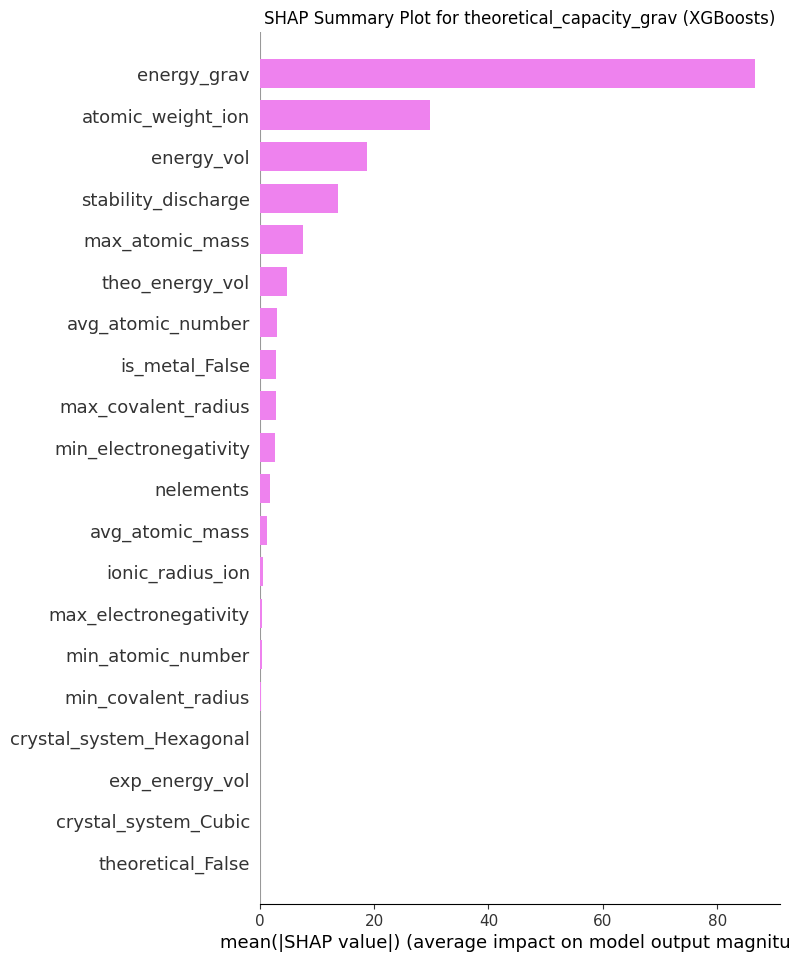


SHAP Summary Plot for average_voltage:


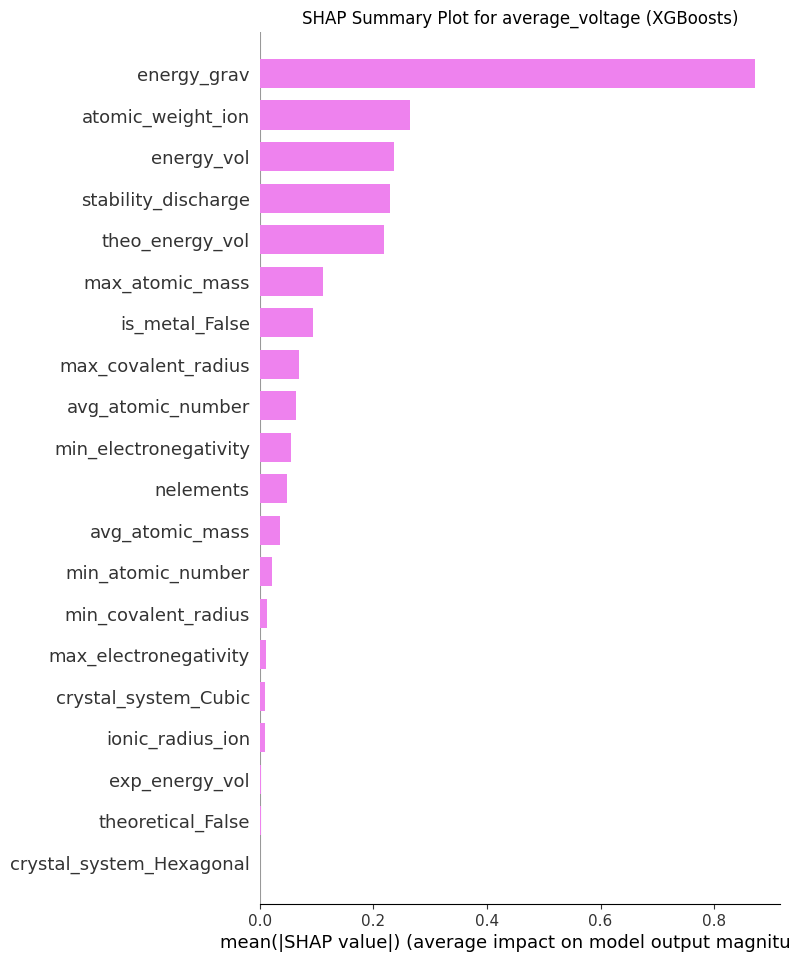


SHAP Summary Plot for energy_above_hull:


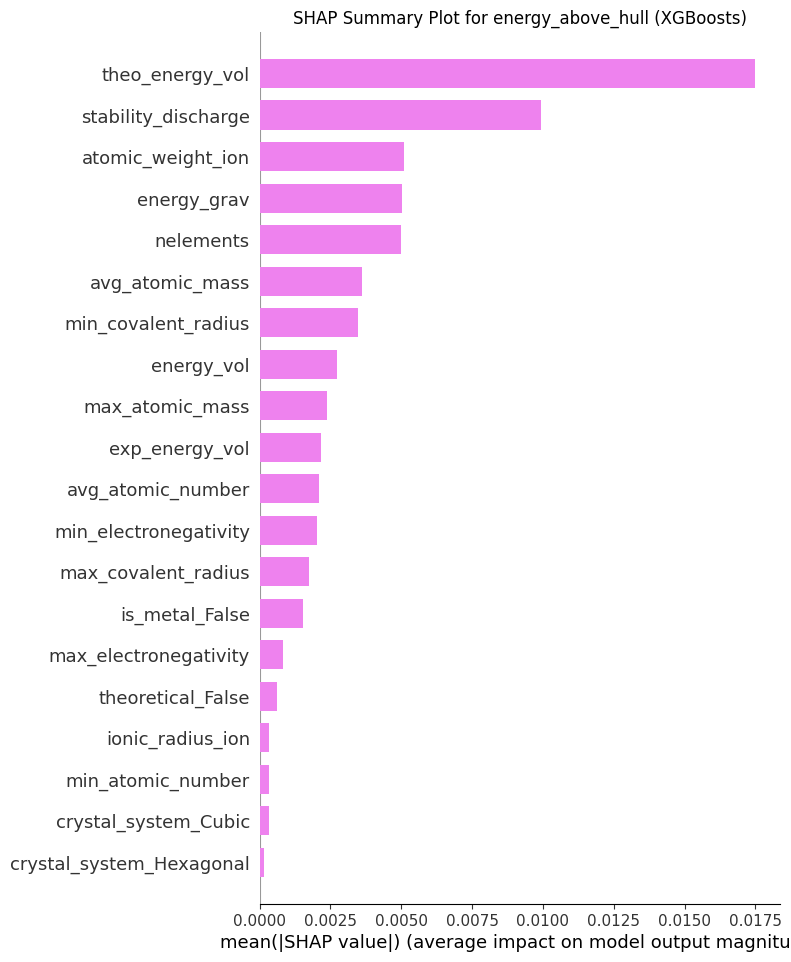

In [ ]:
# Display SHAP summary plots
print("\n--- Displaying SHAP Summary Plots ---")

if 'shap_values_dict' in locals() and 'X_test_shap' in locals() and 'model_features_xgboost' in locals():
    for kpi, shap_values in shap_values_dict.items():
        print(f"\nSHAP Summary Plot for {kpi}:")
        shap.summary_plot(shap_values, X_test_shap, feature_names=model_features_xgboost, plot_type="bar", show=False, color='violet')
        plt.title(f"SHAP Summary Plot for {kpi} (XGBoosts)")
        plt.show() # Display the plot
else:
    print("Required data for SHAP summary plots (shap_values_dict, X_test_shap, model_features_xgboost) not available.")


--- Displaying SHAP Decision Plots ---

Visualizations for target KPI: theoretical_capacity_grav:

--- Visualizations for MnP2O7 and theoretical_capacity_grav (XGBoost)---

Decision plot for MnP2O7 and theoretical_capacity_grav (XGBoosts):


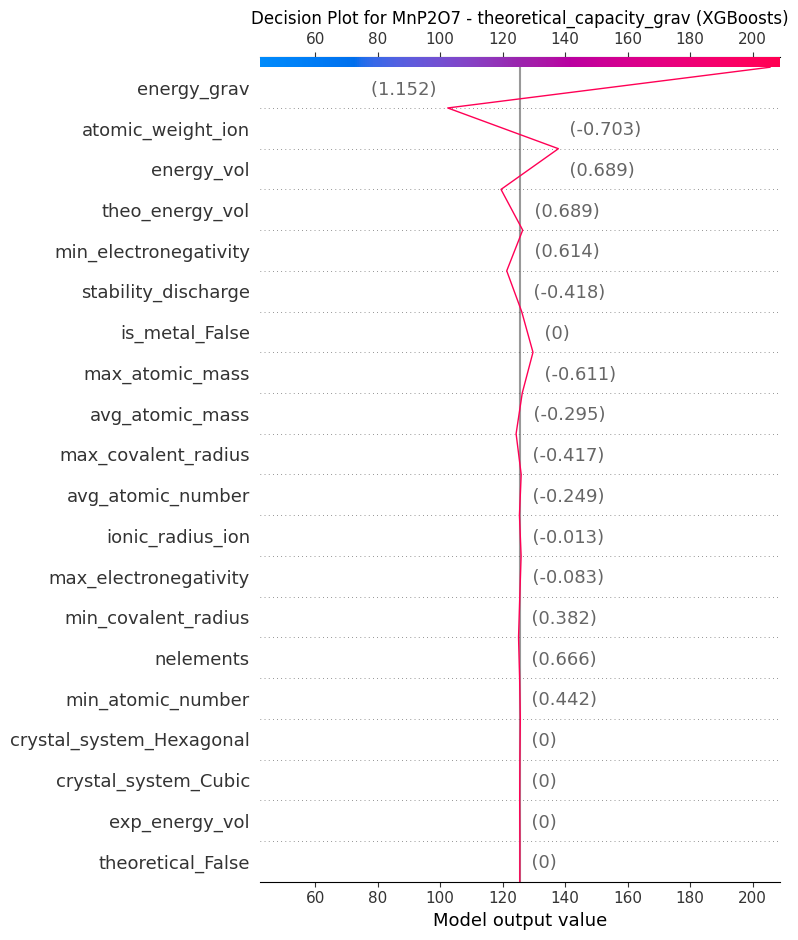


--- Visualizations for LiV(PO4)2 and theoretical_capacity_grav (XGBoost)---

Decision plot for LiV(PO4)2 and theoretical_capacity_grav (XGBoosts):


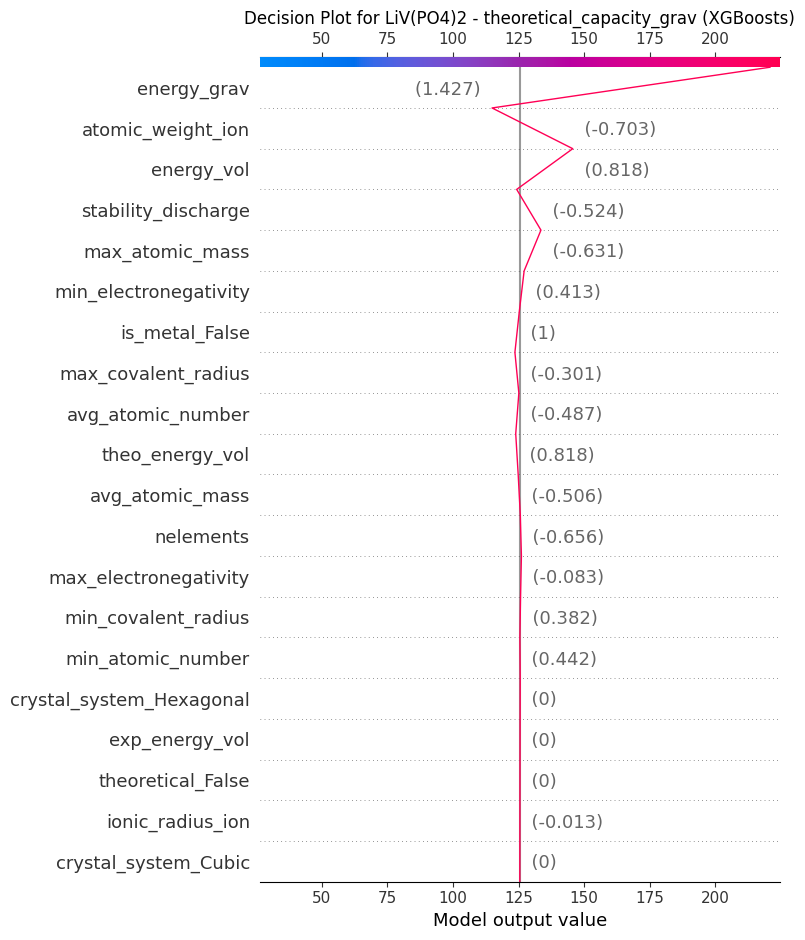


--- Visualizations for VFe3(PO4)6 and theoretical_capacity_grav (XGBoost)---

Decision plot for VFe3(PO4)6 and theoretical_capacity_grav (XGBoosts):


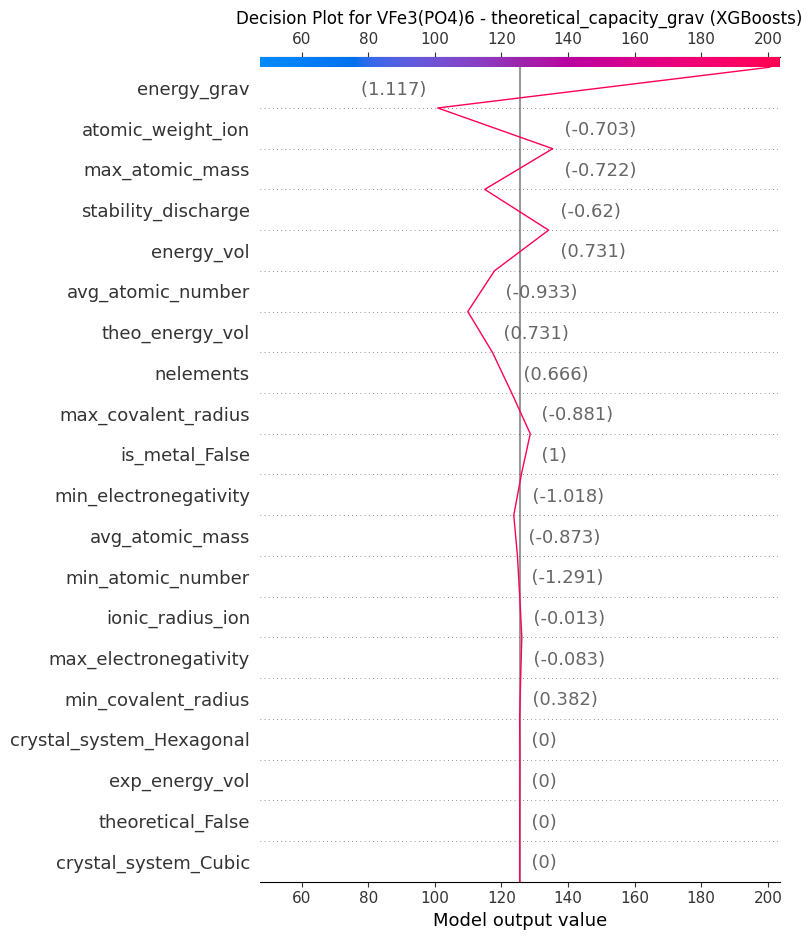


Visualizations for target KPI: average_voltage:

--- Visualizations for MnP2O7 and average_voltage (XGBoost)---

Decision plot for MnP2O7 and average_voltage (XGBoosts):


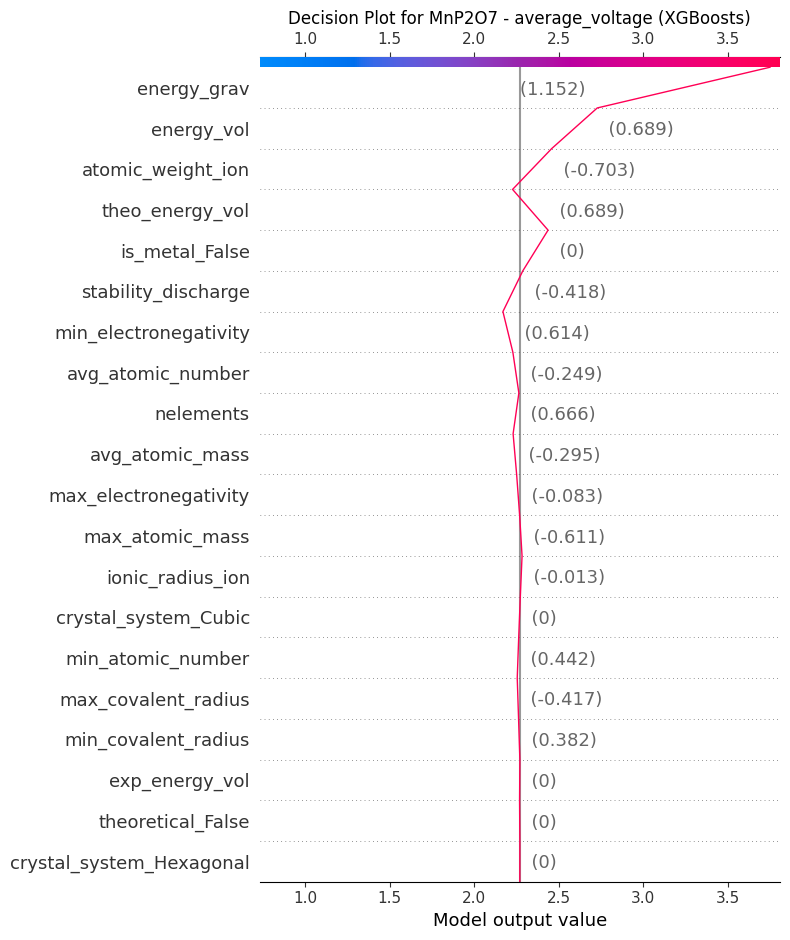


--- Visualizations for LiV(PO4)2 and average_voltage (XGBoost)---

Decision plot for LiV(PO4)2 and average_voltage (XGBoosts):


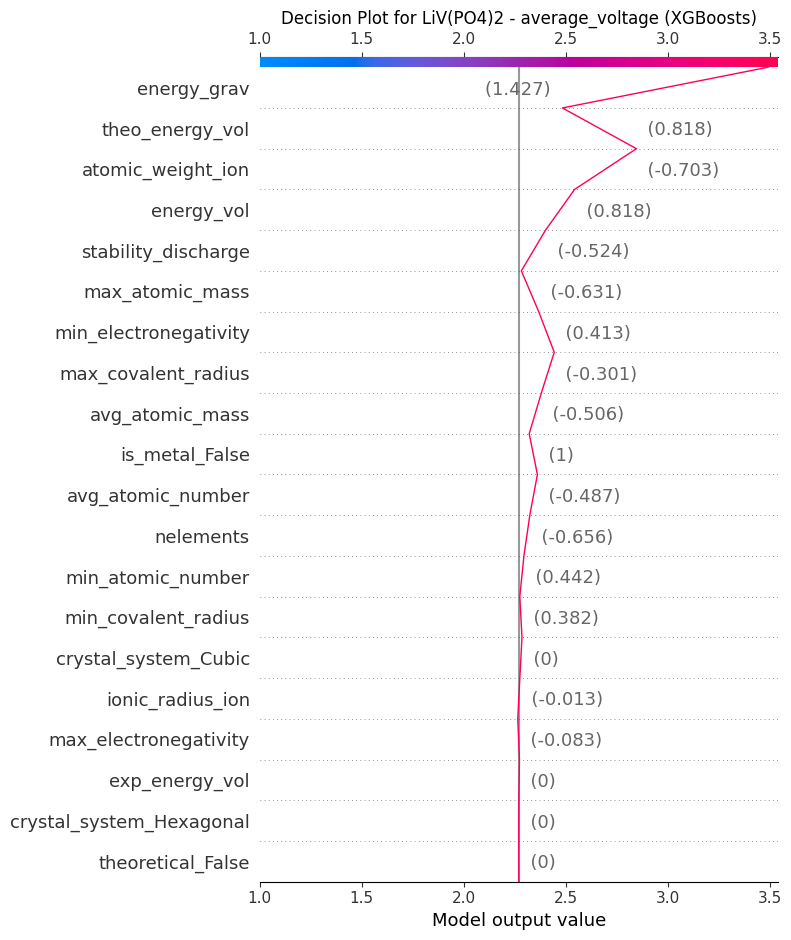


--- Visualizations for VFe3(PO4)6 and average_voltage (XGBoost)---

Decision plot for VFe3(PO4)6 and average_voltage (XGBoosts):


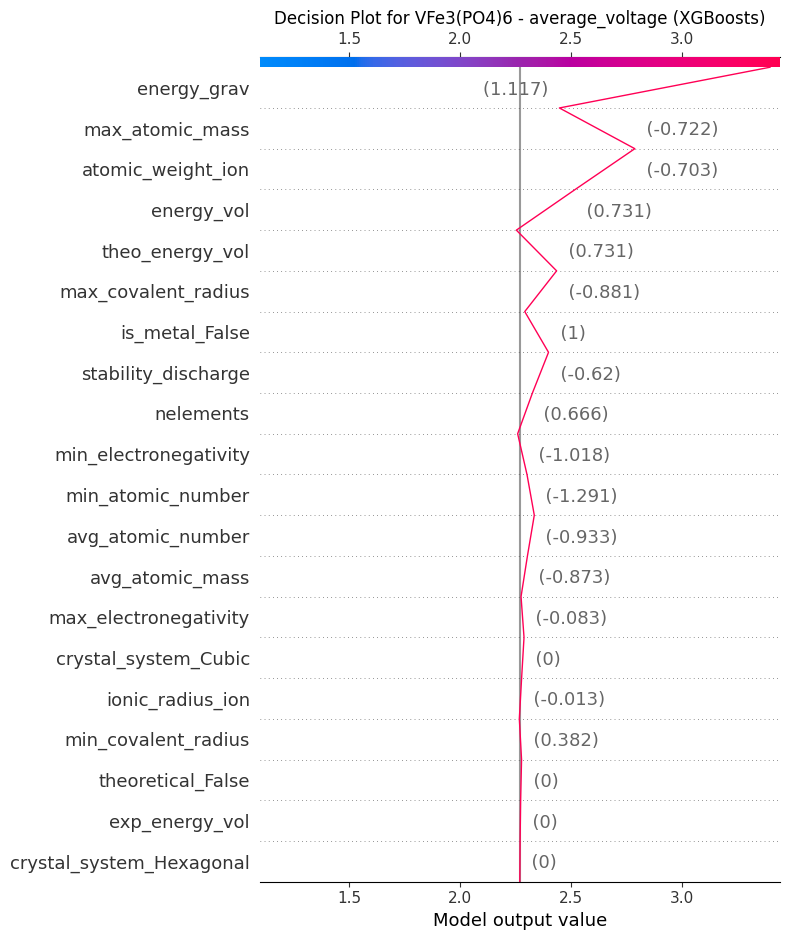


Visualizations for target KPI: energy_above_hull:

--- Visualizations for MnP2O7 and energy_above_hull (XGBoost)---

Decision plot for MnP2O7 and energy_above_hull (XGBoosts):


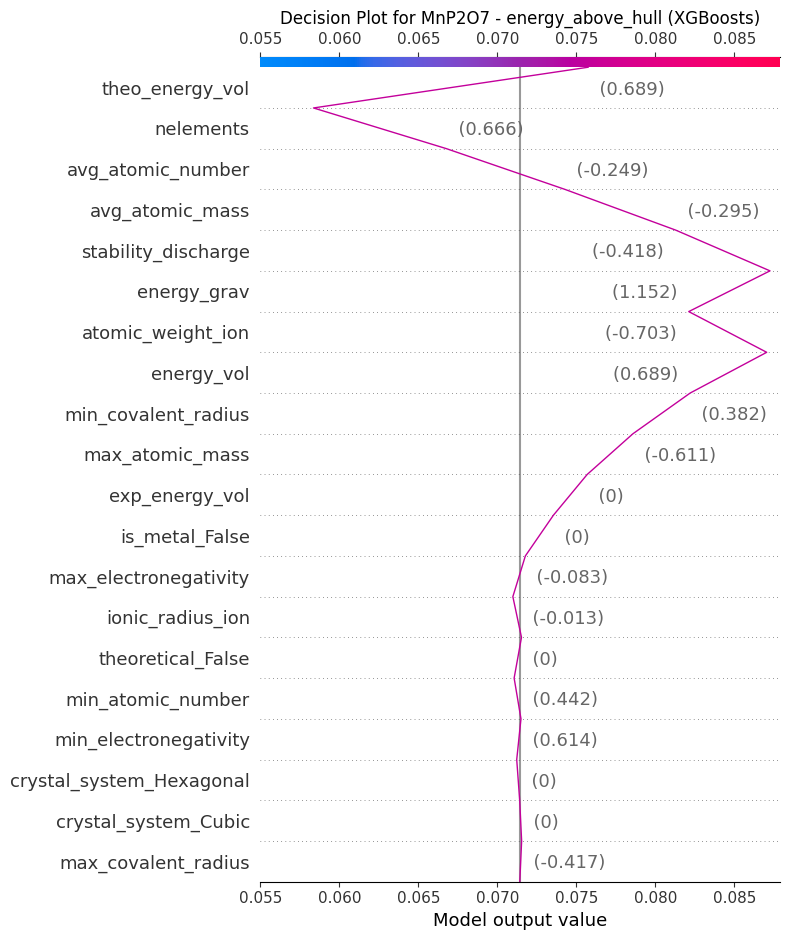


--- Visualizations for LiV(PO4)2 and energy_above_hull (XGBoost)---

Decision plot for LiV(PO4)2 and energy_above_hull (XGBoosts):


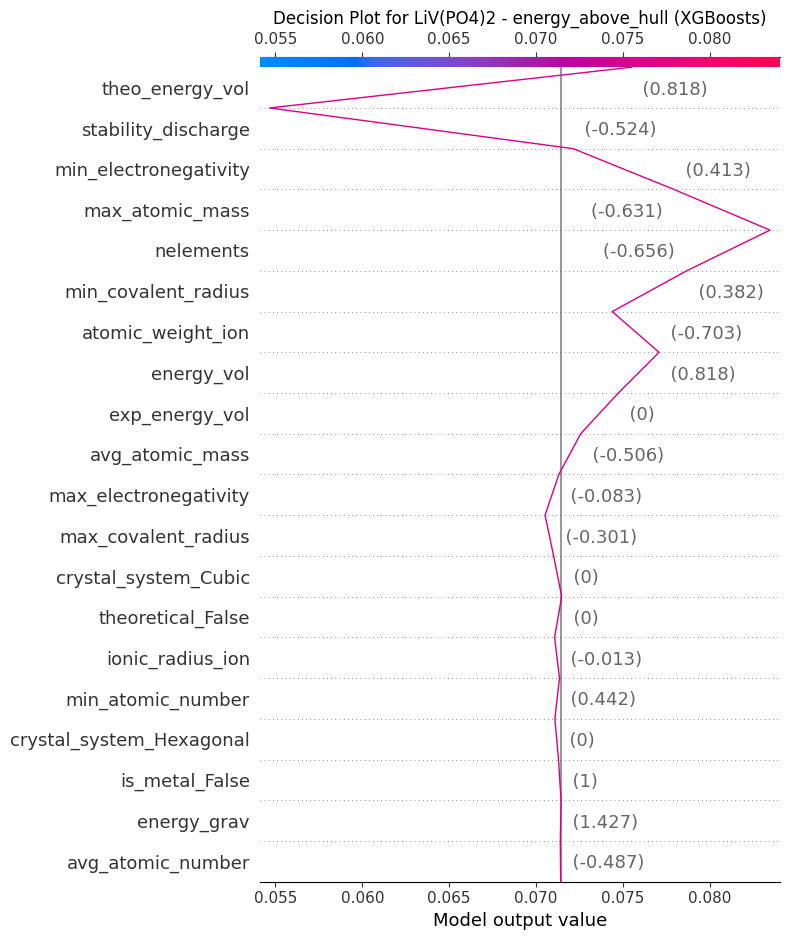


--- Visualizations for VFe3(PO4)6 and energy_above_hull (XGBoost)---

Decision plot for VFe3(PO4)6 and energy_above_hull (XGBoosts):


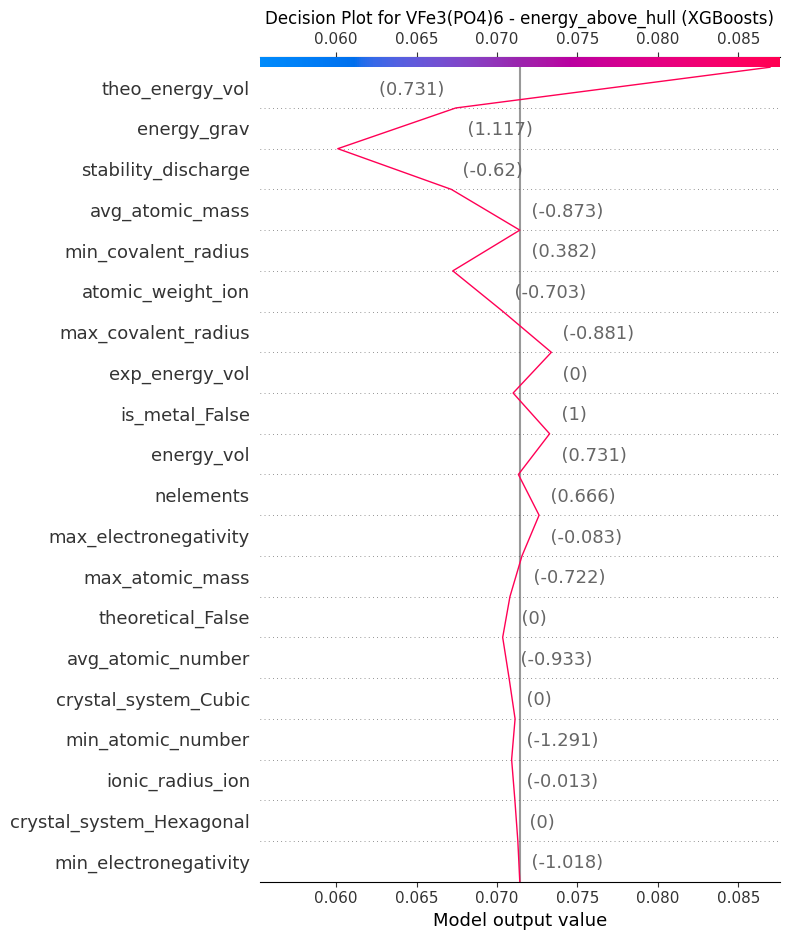

In [ ]:
# Display SHAP Decision plots for each selected material and KPI

print("\n--- Displaying SHAP Decision Plots ---")

if 'shap_values_dict' in locals() and 'X_test_shap' in locals() and 'model_features_xgboost' in locals() and 'shap_materials' in locals() and 'loaded_xgboost_model' in locals() and 'target_kpis' in locals():

    for i, kpi in enumerate(target_kpis):
        print(f"\nVisualizations for target KPI: {kpi}:")
        shap_values = shap_values_dict[kpi]
        explainer = shap.Explainer(loaded_xgboost_model.estimators_[i], X_test_data_xgboost[model_features_xgboost])


        for j, material in enumerate(shap_materials):
            if j < len(shap_values): # Ensure index is within bounds
                print(f"\n--- Visualizations for {material} and {kpi} (XGBoost)---")


                # SHAP Decision Plot
                print(f"\nDecision plot for {material} and {kpi} (XGBoosts):")
                try:
                    # The decision plot can take a single instance or multiple instances
                    # For a single instance, pass the values and expected value
                    shap.decision_plot(explainer.expected_value[j] if isinstance(explainer.expected_value, list) else explainer.expected_value,
                                     shap_values.values[j],
                                     X_test_shap.iloc[j],
                                     feature_names=model_features_xgboost,
                                     show=False) # Use show=False to manage plot display with plt.show()
                    plt.title(f"Decision Plot for {material} - {kpi} (XGBoosts)")
                    plt.tight_layout()
                    plt.show()
                except Exception as e:
                    print(f"Error generating decision plot for {material} and {kpi}: {e}")

            else:
                 print(f"Warning: Could not generate plots for {material} for {kpi}. Index out of bounds.")

else:
    print("Required data for SHAP plots not available.")

## Shap Analysis (Random Forest)

In [ ]:
# Define the list of materials for SHAP analysis (same as before)
shap_materials = ['MnP2O7', 'LiV(PO4)2', 'VFe3(PO4)6']

# Ensure the combined_results dictionary and the Random Forest data are available
if 'combined_results' in locals() and 'Random Forest' in combined_results and combined_results['Random Forest'] is not None:
    combined_df_random_forest = combined_results['Random Forest']
    X_test_data_random_forest = X_test_loaded_dfs_sf['Random Forest']
    loaded_random_forest_model = loaded_random_forest_model # Ensure the model is loaded

    # Filter the X_test data to include only the specified materials
    # Use the combined dataframe for Random Forest to get the correct indices
    shap_data_indices_rf = combined_df_random_forest[combined_df_random_forest['formula_pretty'].isin(shap_materials)].index
    X_test_shap_rf = X_test_data_random_forest.loc[shap_data_indices_rf].copy()

    # Get the feature names used by the Random Forest model
    model_features_random_forest = loaded_feature_names['Random Forest']

    # Ensure the SHAP data has the correct columns in the correct order
    X_test_shap_rf = X_test_shap_rf[model_features_random_forest]

    print("SHAP analysis data prepared for Random Forest.")

else:
    print("Required data (combined_results, X_test_loaded_dfs_sf, loaded_random_forest_model) for Random Forest SHAP analysis not available. Please run the previous cells.")

SHAP analysis data prepared for Random Forest.


In [ ]:
# Initialize the SHAP explainer and calculate SHAP values for Random Forest
print("\n--- Performing SHAP Analysis for Specified Materials using Random Forest Model ---")

# Dictionary to store SHAP values for each KPI for Random Forest
shap_values_dict_rf = {}

# Iterate through each target KPI and calculate SHAP values
if 'X_test_shap_rf' in locals() and 'loaded_random_forest_model' in locals() and 'model_features_random_forest' in locals() and 'target_kpis' in locals():
    for i, kpi in enumerate(target_kpis):
        print(f"\nCalculating SHAP values for target KPI: {kpi} (Random Forest)")

        # SHAP explainer for the current output (target KPI) using the Random Forest estimator
        explainer_rf = shap.Explainer(loaded_random_forest_model.estimators_[i], X_test_data_random_forest[model_features_random_forest])


        # Calculate SHAP values for the selected materials
        shap_values_rf = explainer_rf(X_test_shap_rf)
        shap_values_dict_rf[kpi] = shap_values_rf
        print(f"SHAP values calculated for {kpi} (Random Forest).")
else:
    print("Required data for SHAP value calculation (Random Forest) not available.")


--- Performing SHAP Analysis for Specified Materials using Random Forest Model ---

Calculating SHAP values for target KPI: theoretical_capacity_grav (Random Forest)
SHAP values calculated for theoretical_capacity_grav (Random Forest).

Calculating SHAP values for target KPI: average_voltage (Random Forest)
SHAP values calculated for average_voltage (Random Forest).

Calculating SHAP values for target KPI: energy_above_hull (Random Forest)
SHAP values calculated for energy_above_hull (Random Forest).



--- Displaying SHAP Summary Plots (Random Forest) ---

SHAP Summary Plot for theoretical_capacity_grav (Random Forest):


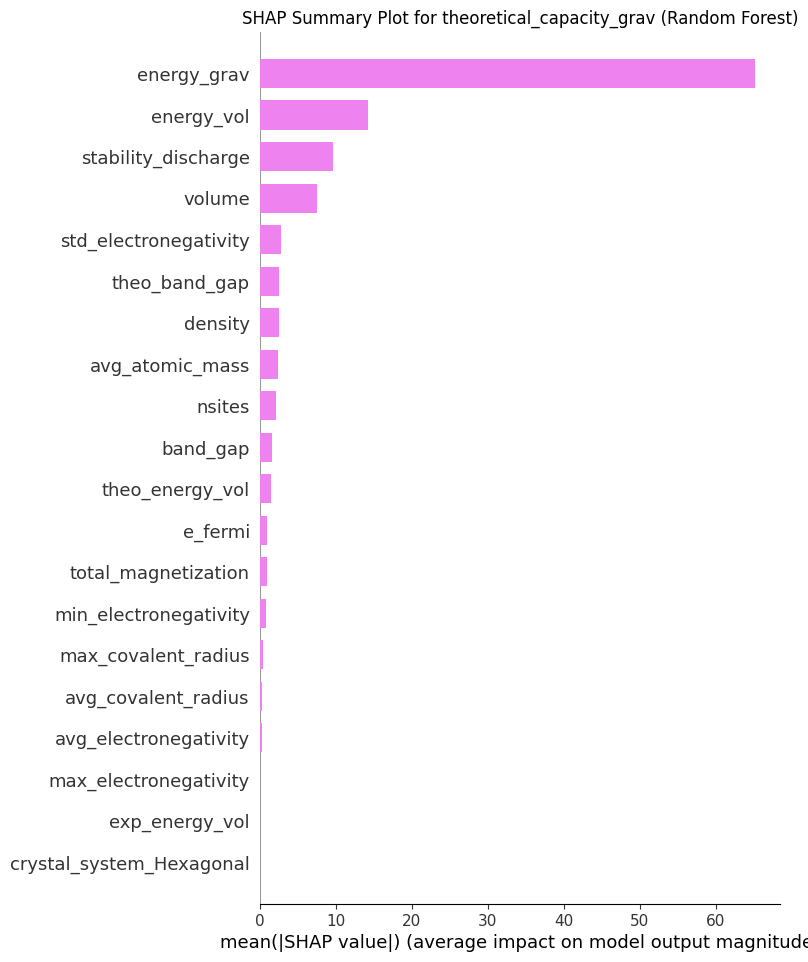


SHAP Summary Plot for average_voltage (Random Forest):


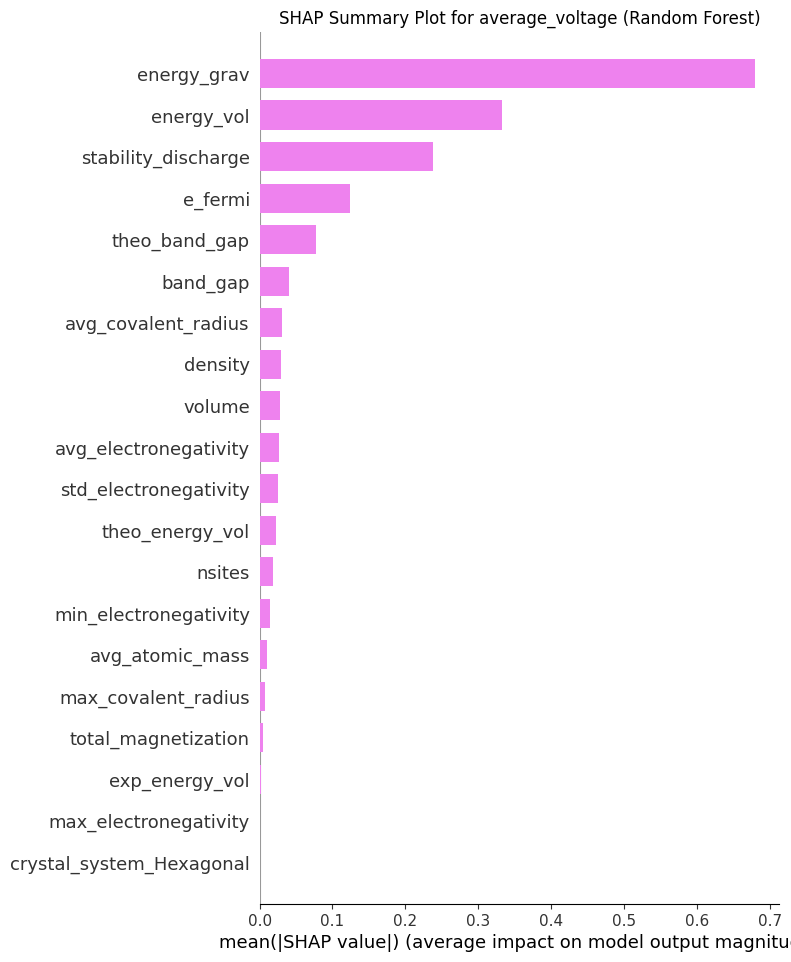


SHAP Summary Plot for energy_above_hull (Random Forest):


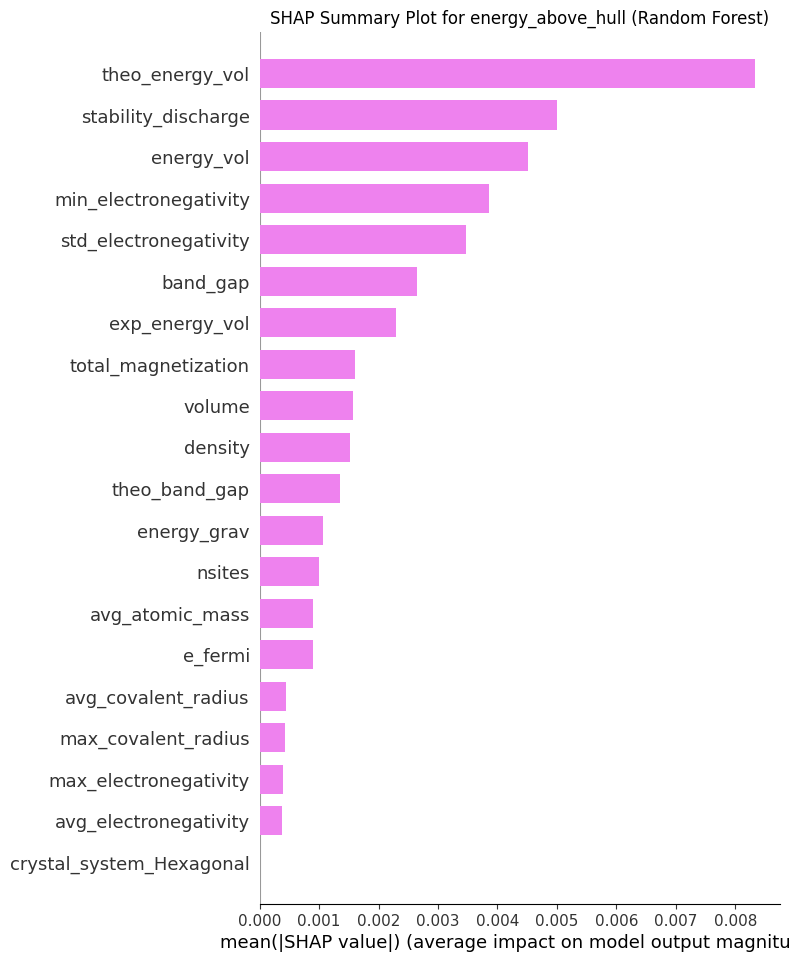

In [ ]:
# Display SHAP summary plots for Random Forest
print("\n--- Displaying SHAP Summary Plots (Random Forest) ---")

if 'shap_values_dict_rf' in locals() and 'X_test_shap_rf' in locals() and 'model_features_random_forest' in locals():
    for kpi, shap_values_rf in shap_values_dict_rf.items():
        print(f"\nSHAP Summary Plot for {kpi} (Random Forest):")
        shap.summary_plot(shap_values_rf, X_test_shap_rf, feature_names=model_features_random_forest, plot_type="bar", show=False, color='violet')
        plt.title(f"SHAP Summary Plot for {kpi} (Random Forest)")
        plt.show() # Display the plot
else:
    print("Required data for SHAP summary plots (Random Forest) not available.")


--- Displaying SHAP Decision Plots (Random Forest - One Plot per Material) ---

Decision Plots for target KPI: theoretical_capacity_grav (Random Forest):

--- Decision Plot for VFe3(PO4)6 (Index: 2970) and theoretical_capacity_grav (Random Forest) ---


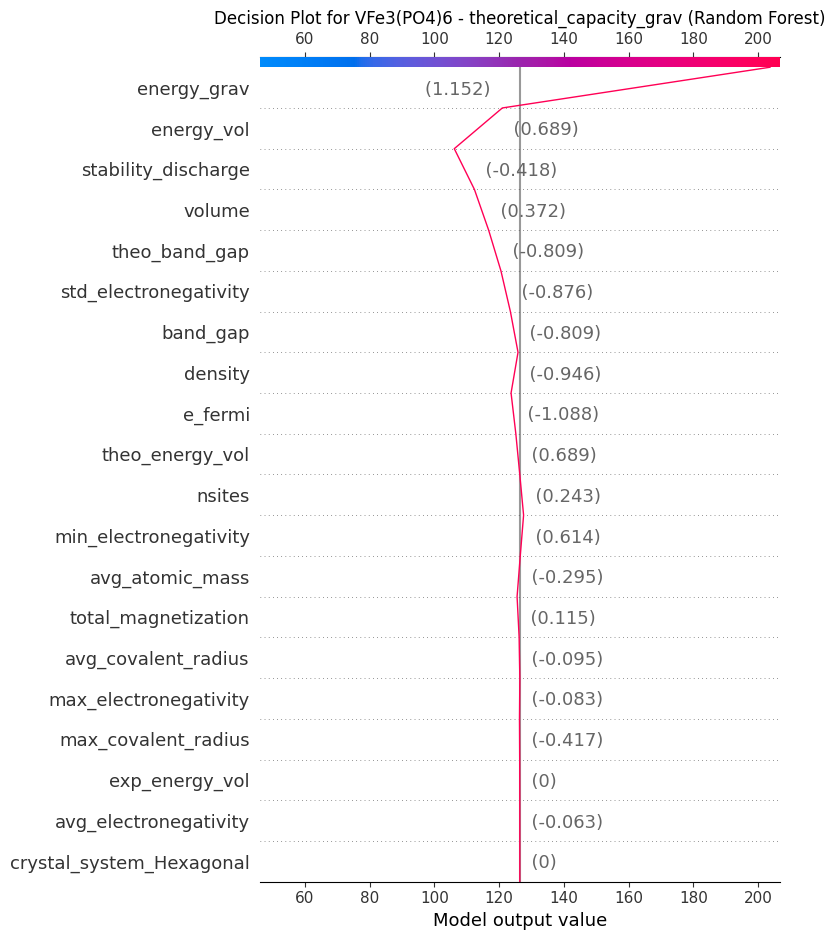


--- Decision Plot for MnP2O7 (Index: 1432) and theoretical_capacity_grav (Random Forest) ---


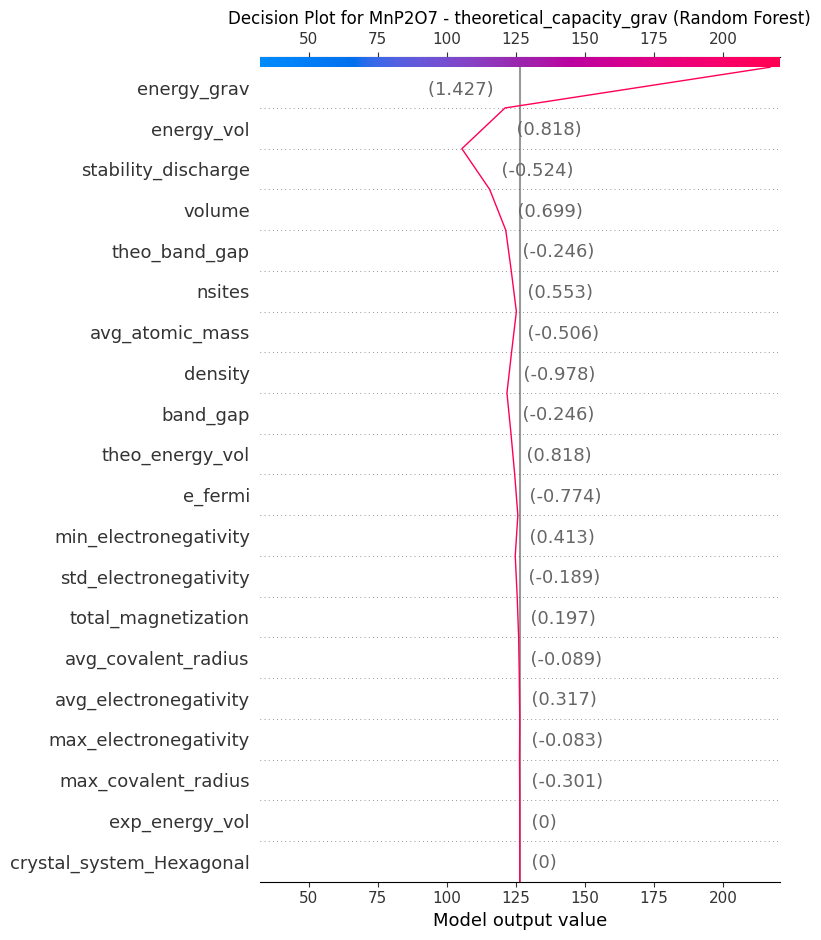


--- Decision Plot for LiV(PO4)2 (Index: 2649) and theoretical_capacity_grav (Random Forest) ---


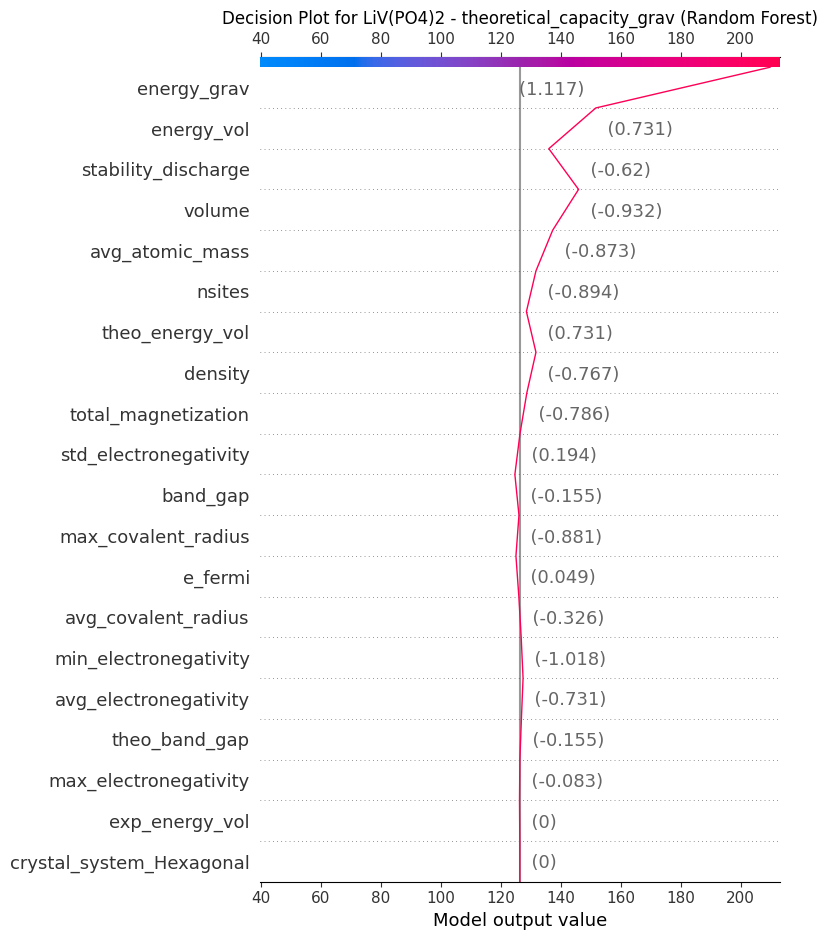


Decision Plots for target KPI: average_voltage (Random Forest):

--- Decision Plot for VFe3(PO4)6 (Index: 2970) and average_voltage (Random Forest) ---


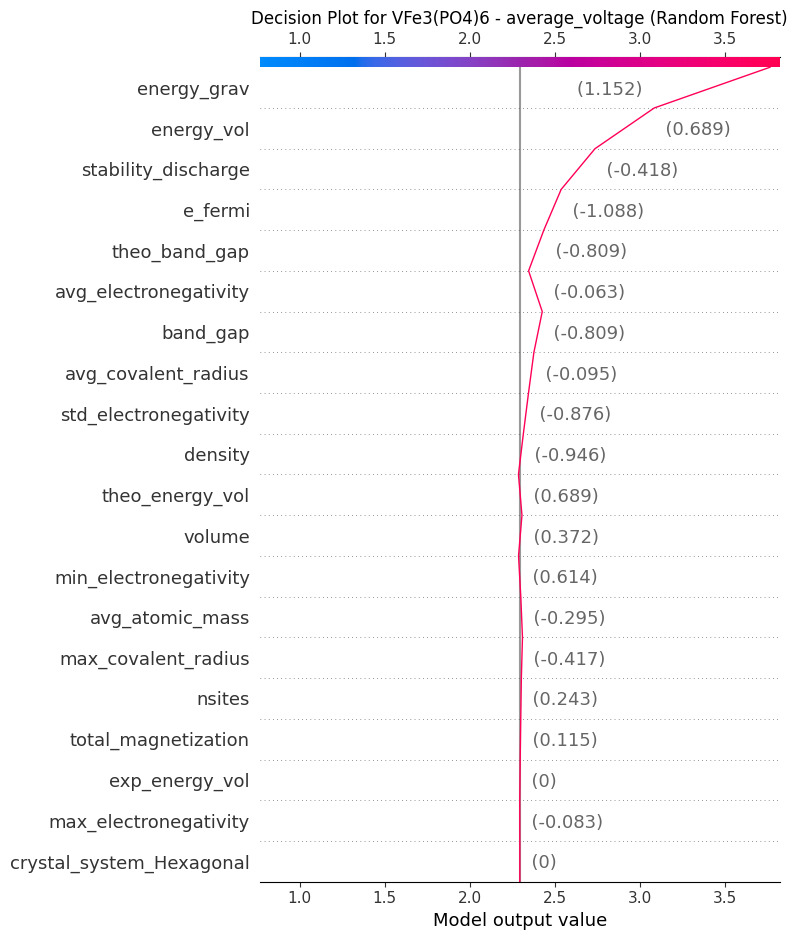


--- Decision Plot for MnP2O7 (Index: 1432) and average_voltage (Random Forest) ---


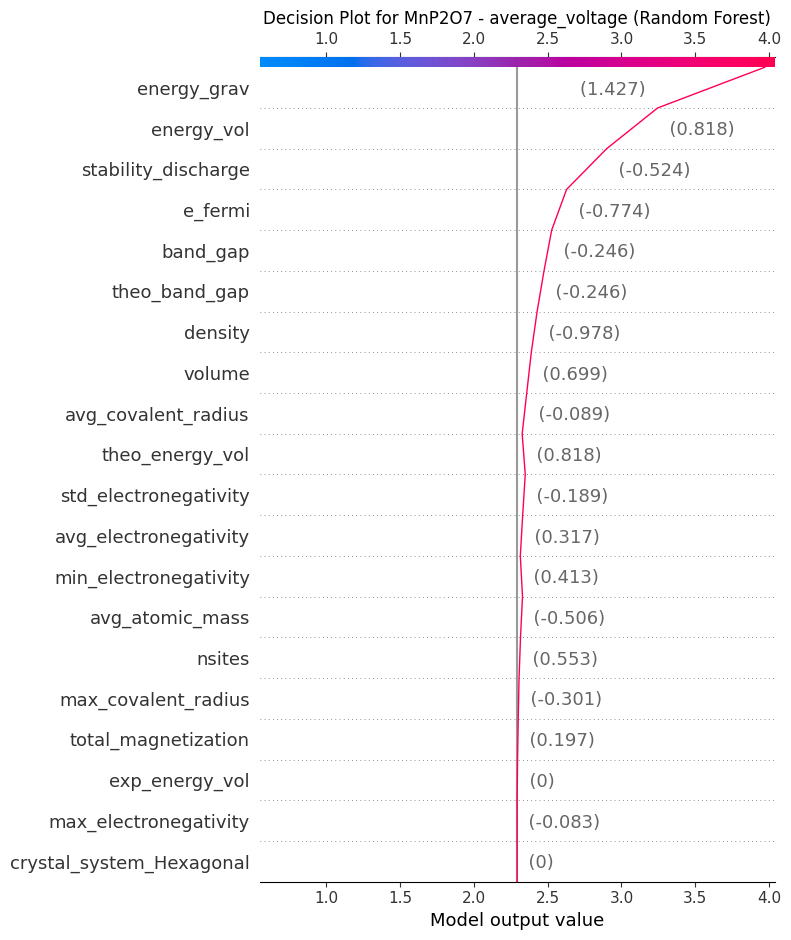


--- Decision Plot for LiV(PO4)2 (Index: 2649) and average_voltage (Random Forest) ---


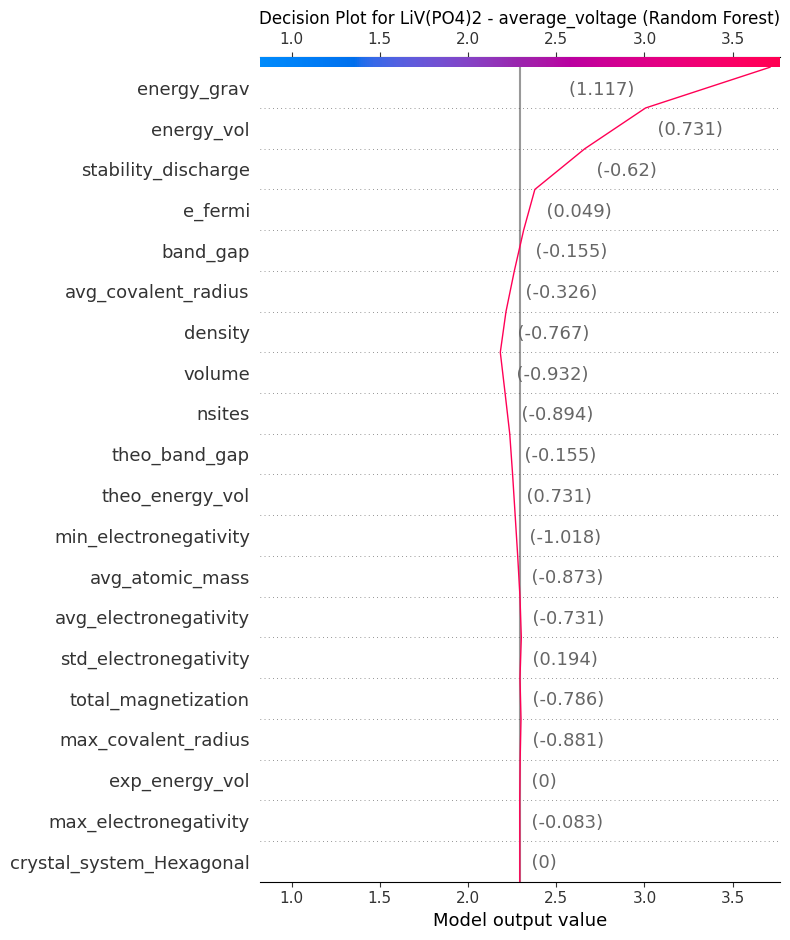


Decision Plots for target KPI: energy_above_hull (Random Forest):

--- Decision Plot for VFe3(PO4)6 (Index: 2970) and energy_above_hull (Random Forest) ---


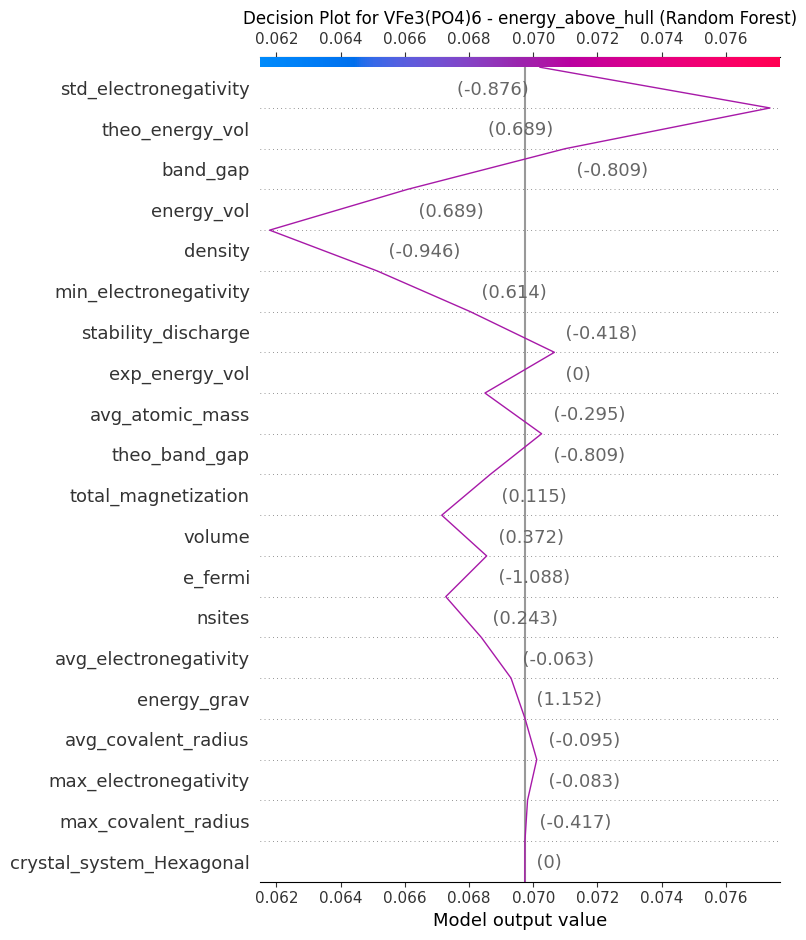


--- Decision Plot for MnP2O7 (Index: 1432) and energy_above_hull (Random Forest) ---


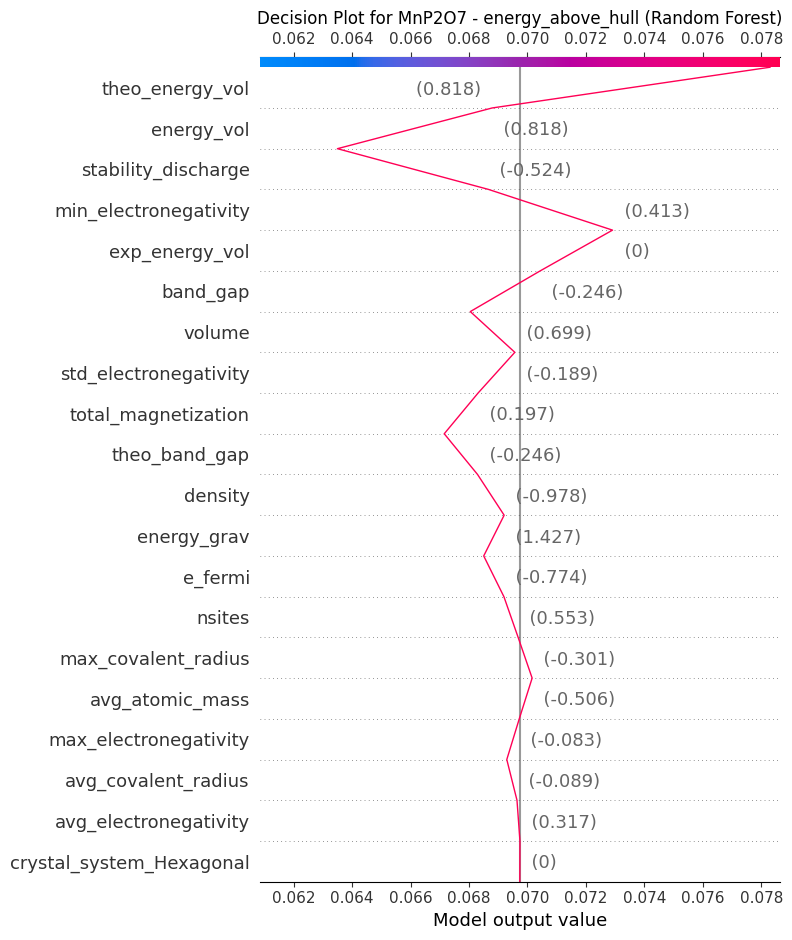


--- Decision Plot for LiV(PO4)2 (Index: 2649) and energy_above_hull (Random Forest) ---


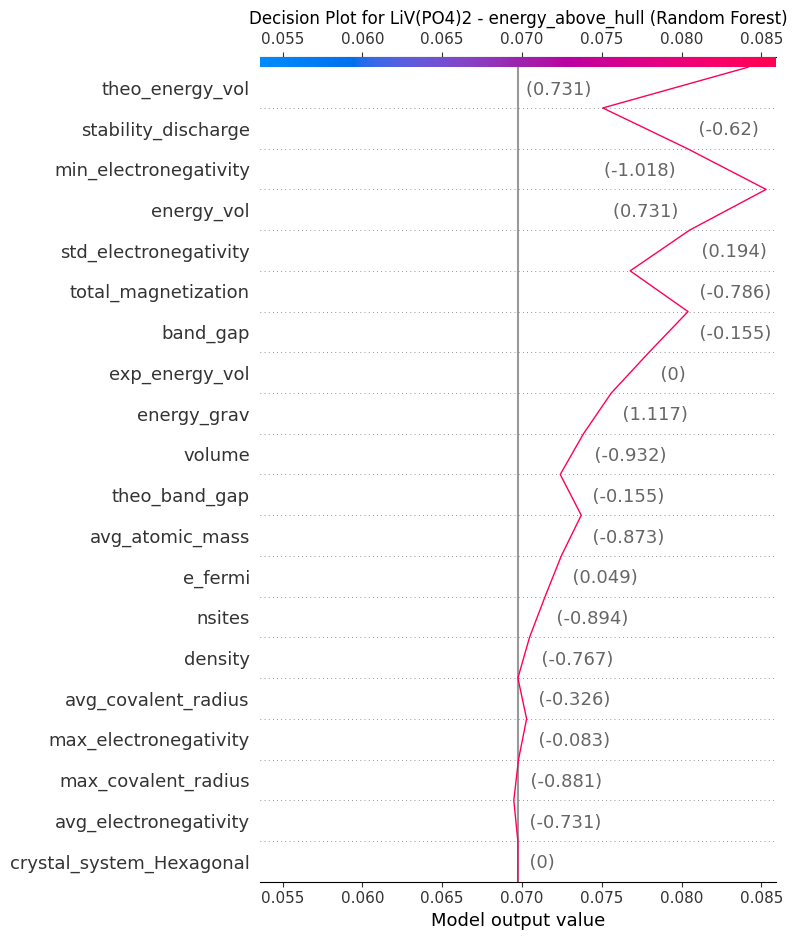

In [ ]:
# Display SHAP Decision plots for Random Forest (one plot per unique material)
print("\n--- Displaying SHAP Decision Plots (Random Forest - One Plot per Material) ---")

if 'shap_values_dict_rf' in locals() and 'X_test_shap_rf' in locals() and 'model_features_random_forest' in locals() and 'shap_materials' in locals() and 'loaded_random_forest_model' in locals() and 'target_kpis' in locals() and 'combined_df_random_forest' in locals():

    for i, kpi in enumerate(target_kpis):
        print(f"\nDecision Plots for target KPI: {kpi} (Random Forest):")
        shap_values_rf = shap_values_dict_rf[kpi]
        # Need a new explainer instance for the decision plot which uses the original explainer base_values
        explainer_rf_decision = shap.Explainer(loaded_random_forest_model.estimators_[i], X_test_data_random_forest[model_features_random_forest])

        plotted_materials = set() # Keep track of materials for which a plot has been generated


        # Iterate through the indices of X_test_shap_rf instead of shap_materials
        for index, row in X_test_shap_rf.iterrows():
             material = combined_df_random_forest.loc[index, 'formula_pretty']

             # Check if a plot for this material has already been generated
             if material in plotted_materials:
                 continue # Skip to the next iteration


             # Find the corresponding integer index in the shap_values_rf
             # This assumes the order of instances in shap_values_rf matches X_test_shap_rf
             try:
                 j = list(X_test_shap_rf.index).index(index) # Get the integer position of the current index
             except ValueError:
                 print(f"Warning: Index {index} not found in X_test_shap_rf indices. Skipping this instance.")
                 continue # Skip to the next iteration


             if j < len(shap_values_rf.values): # Ensure integer index is within bounds of shap_values' values array
                print(f"\n--- Decision Plot for {material} (Index: {index}) and {kpi} (Random Forest) ---")

                # SHAP Decision Plot for Random Forest
                try:
                    shap.decision_plot(explainer_rf_decision.expected_value[j] if isinstance(explainer_rf_decision.expected_value, list) else explainer_rf_decision.expected_value,
                                         shap_values_rf.values[j],
                                         row, # Pass the feature values for the current row (which is already a Series)
                                         feature_names=model_features_random_forest,
                                         show=False) # Use show=False to manage plot display with plt.show()
                    plt.title(f"Decision Plot for {material} - {kpi} (Random Forest)")
                    plt.tight_layout()
                    plt.show()
                    plotted_materials.add(material) # Add the material to the set after plotting
                except Exception as e:
                    print(f"Error generating decision plot for {material} (Index: {index}) and {kpi} (Random Forest): {e}")
                    # Print a more specific message if the issue persists
                    print("Possible issue with data or SHAP value alignment for this instance.")


             else:
                print(f"Warning: Could not generate decision plot for {material} (Index: {index}) for {kpi} (Random Forest). Integer index {j} out of bounds for SHAP values.")

else:
    print("Required data (combined_results, X_test_loaded_dfs_sf, loaded_random_forest_model) for Random Forest SHAP analysis not available. Please run the previous cells.")

## SHAP Analysis (LightGBM)

In [ ]:
# Define the list of materials for SHAP analysis (same as before)
shap_materials = ['MnP2O7', 'LiV(PO4)2', 'VFe3(PO4)6']

# Ensure the combined_results dictionary and the LightGBM data are available
if 'combined_results' in locals() and 'LightGBM' in combined_results and combined_results['LightGBM'] is not None:
    combined_df_lightgbm = combined_results['LightGBM']
    X_test_data_lightgbm = X_test_loaded_dfs_sf['LightGBM']
    loaded_lightgbm_model = loaded_lightgbm_model # Ensure the model is loaded

    # Filter the X_test data to include only the specified materials
    # Use the combined dataframe for LightGBM to get the correct indices
    shap_data_indices_lgbm = combined_df_lightgbm[combined_df_lightgbm['formula_pretty'].isin(shap_materials)].index
    X_test_shap_lgbm = X_test_data_lightgbm.loc[shap_data_indices_lgbm].copy()


    # Get the feature names used by the LightGBM model
    model_features_lightgbm = loaded_feature_names['LightGBM']


    # Ensure the SHAP data has the correct columns in the correct order
    X_test_shap_lgbm = X_test_shap_lgbm[model_features_lightgbm]

    print("SHAP analysis data prepared for LightGBM.")


else:
    print("Required data (combined_results, X_test_loaded_dfs_sf, loaded_lightgbm_model) for LightGBM SHAP analysis not available. Please run the previous cells.")

SHAP analysis data prepared for LightGBM.


In [ ]:
# Initialize the SHAP explainer and calculate SHAP values for LightGBM
print("\n--- Performing SHAP Analysis for Specified Materials using LightGBM Model ---")

# Dictionary to store SHAP values for each KPI for LightGBM
shap_values_dict_lgbm = {}

# Iterate through each target KPI and calculate SHAP values
if 'X_test_shap_lgbm' in locals() and 'loaded_lightgbm_model' in locals() and 'model_features_lightgbm' in locals() and 'target_kpis' in locals():
    for i, kpi in enumerate(target_kpis):
        print(f"\nCalculating SHAP values for target KPI: {kpi} (LightGBM)")

        # SHAP explainer for the current output (target KPI) using the LightGBM estimator
        explainer_lgbm = shap.Explainer(loaded_lightgbm_model.estimators_[i], X_test_data_lightgbm[model_features_lightgbm])


        # Calculate SHAP values for the selected materials
        shap_values_lgbm = explainer_lgbm(X_test_shap_lgbm)
        shap_values_dict_lgbm[kpi] = shap_values_lgbm
        print(f"SHAP values calculated for {kpi} (LightGBM).")
else:
    print("Required data for SHAP value calculation (LightGBM) not available.")


--- Performing SHAP Analysis for Specified Materials using LightGBM Model ---

Calculating SHAP values for target KPI: theoretical_capacity_grav (LightGBM)
SHAP values calculated for theoretical_capacity_grav (LightGBM).

Calculating SHAP values for target KPI: average_voltage (LightGBM)
SHAP values calculated for average_voltage (LightGBM).

Calculating SHAP values for target KPI: energy_above_hull (LightGBM)
SHAP values calculated for energy_above_hull (LightGBM).



--- Displaying SHAP Summary Plots (LightGBM) ---

SHAP Summary Plot for theoretical_capacity_grav (LightGBM):


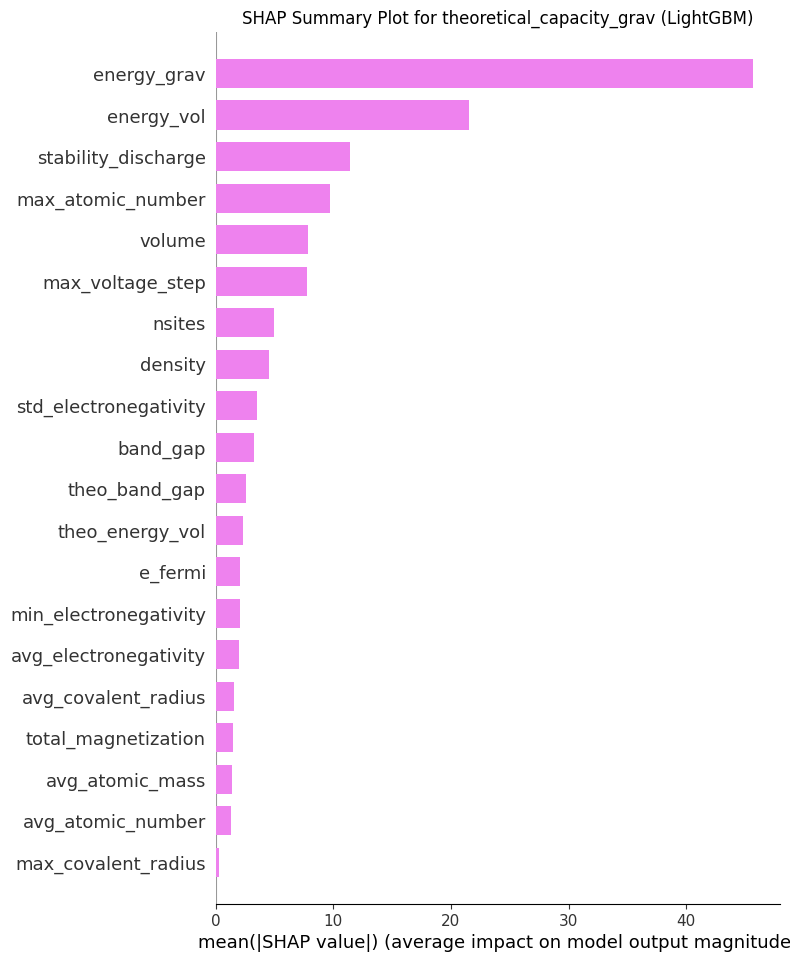


SHAP Summary Plot for average_voltage (LightGBM):


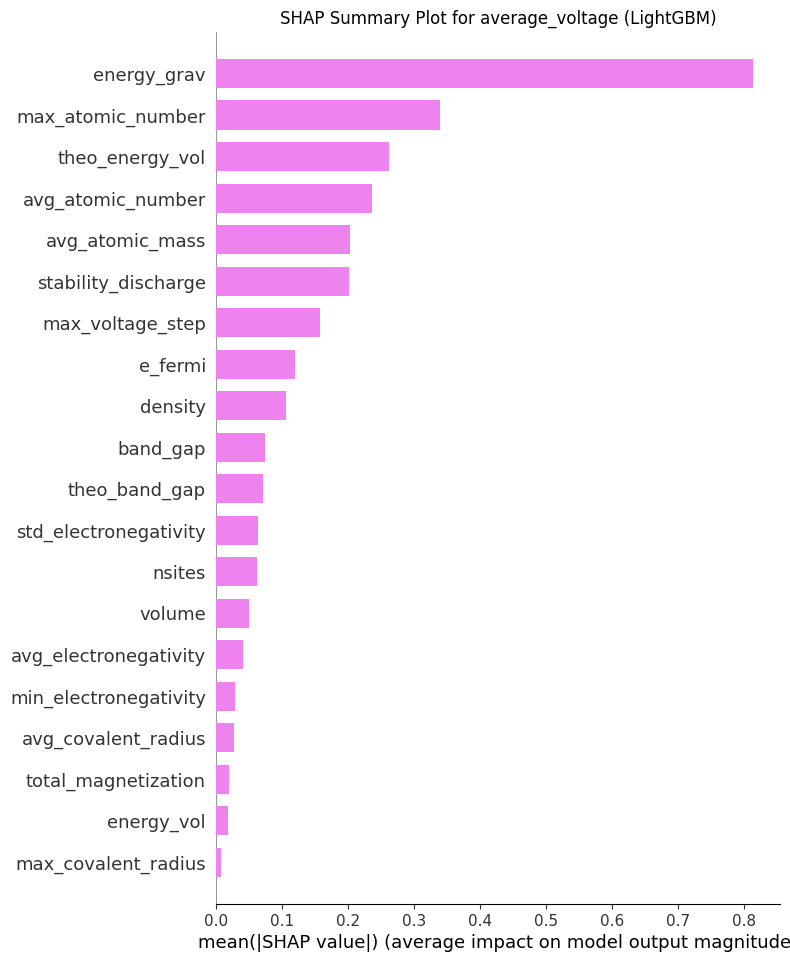


SHAP Summary Plot for energy_above_hull (LightGBM):


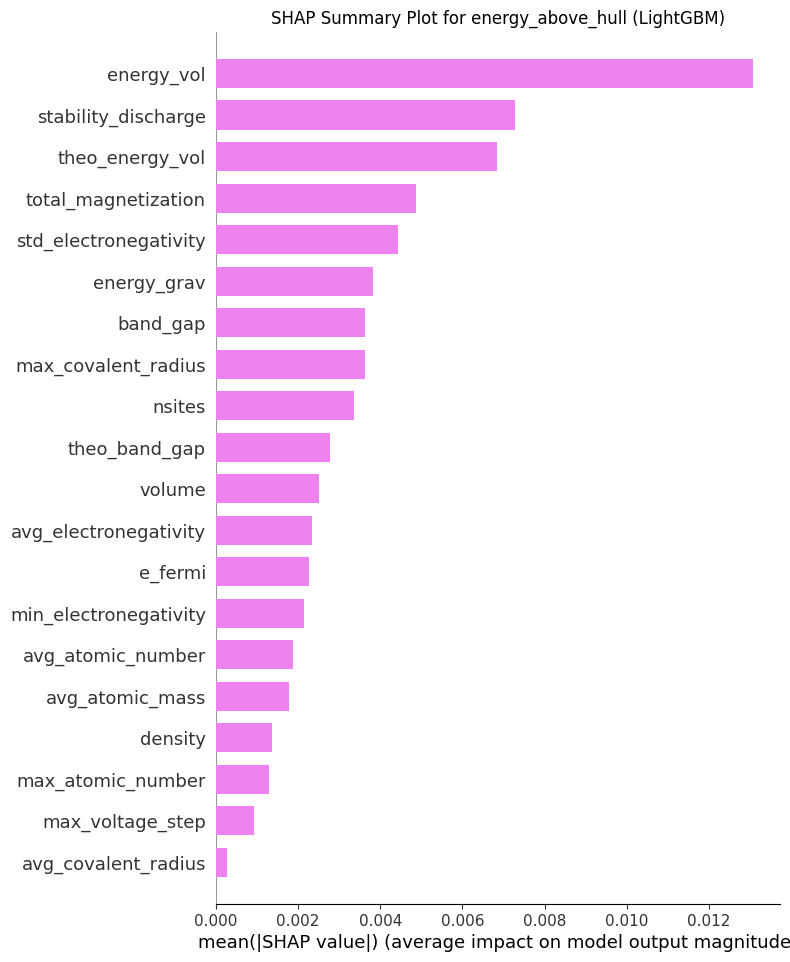

In [ ]:
# Display SHAP summary plots for LightGBM
print("\n--- Displaying SHAP Summary Plots (LightGBM) ---")

if 'shap_values_dict_lgbm' in locals() and 'X_test_shap_lgbm' in locals() and 'model_features_lightgbm' in locals():
    for kpi, shap_values_lgbm in shap_values_dict_lgbm.items():
        print(f"\nSHAP Summary Plot for {kpi} (LightGBM):")
        shap.summary_plot(shap_values_lgbm, X_test_shap_lgbm, feature_names=model_features_lightgbm, plot_type="bar", show=False, color='violet')
        plt.title(f"SHAP Summary Plot for {kpi} (LightGBM)")
        plt.show() # Display the plot
else:
    print("Required data for SHAP summary plots (LightGBM) not available.")


--- Displaying SHAP Decision Plots (LightGBM - One Plot per Material) ---

Decision Plots for target KPI: theoretical_capacity_grav (LightGBM):

--- Decision Plot for VFe3(PO4)6 (Index: 2970) and theoretical_capacity_grav (LightGBM) ---


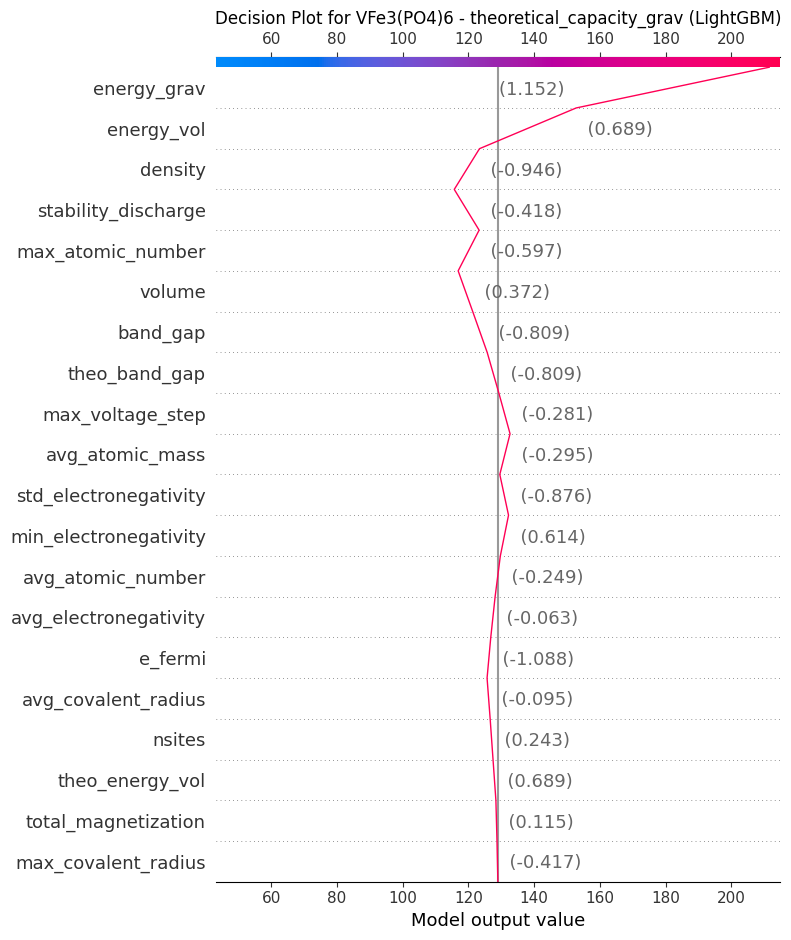


--- Decision Plot for MnP2O7 (Index: 1432) and theoretical_capacity_grav (LightGBM) ---


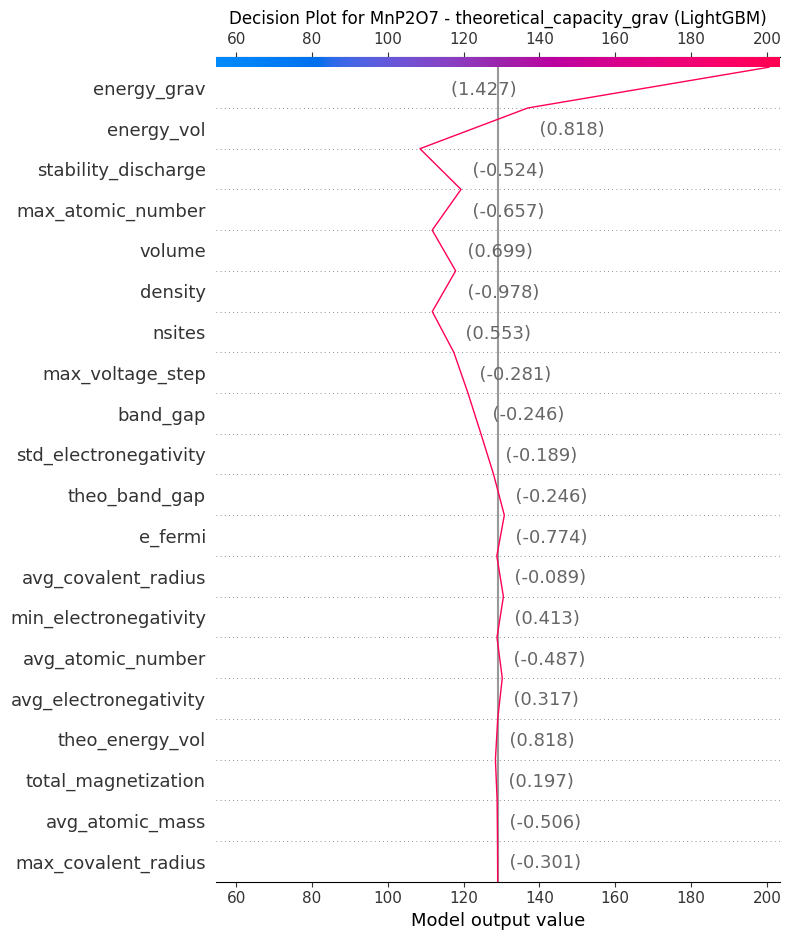


--- Decision Plot for LiV(PO4)2 (Index: 2649) and theoretical_capacity_grav (LightGBM) ---


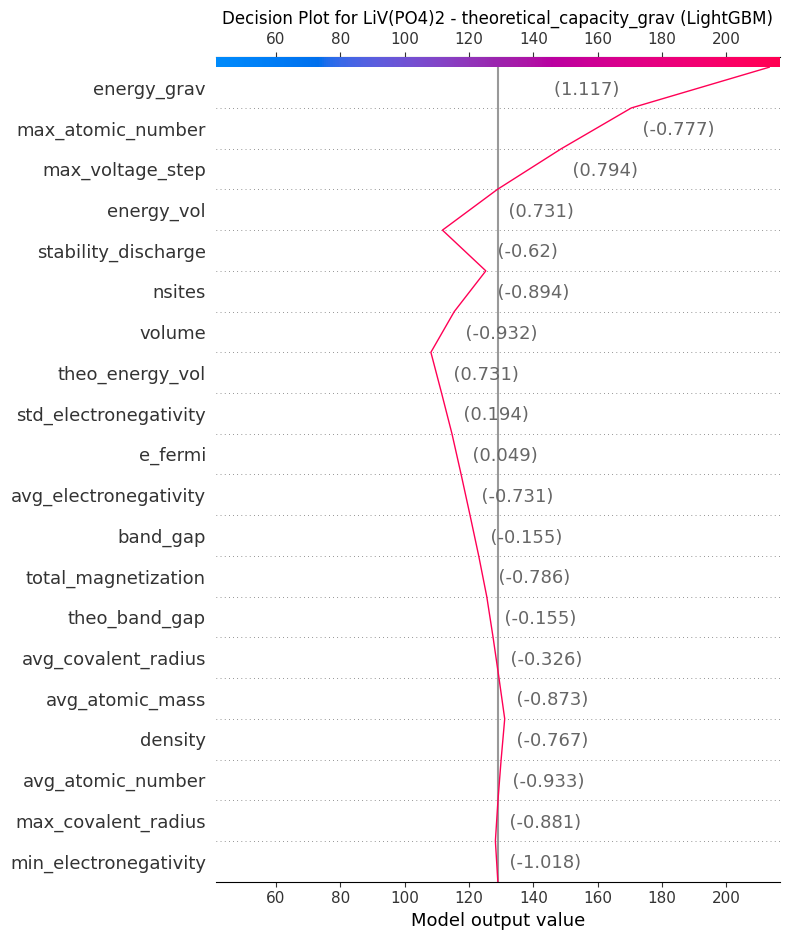


Decision Plots for target KPI: average_voltage (LightGBM):

--- Decision Plot for VFe3(PO4)6 (Index: 2970) and average_voltage (LightGBM) ---


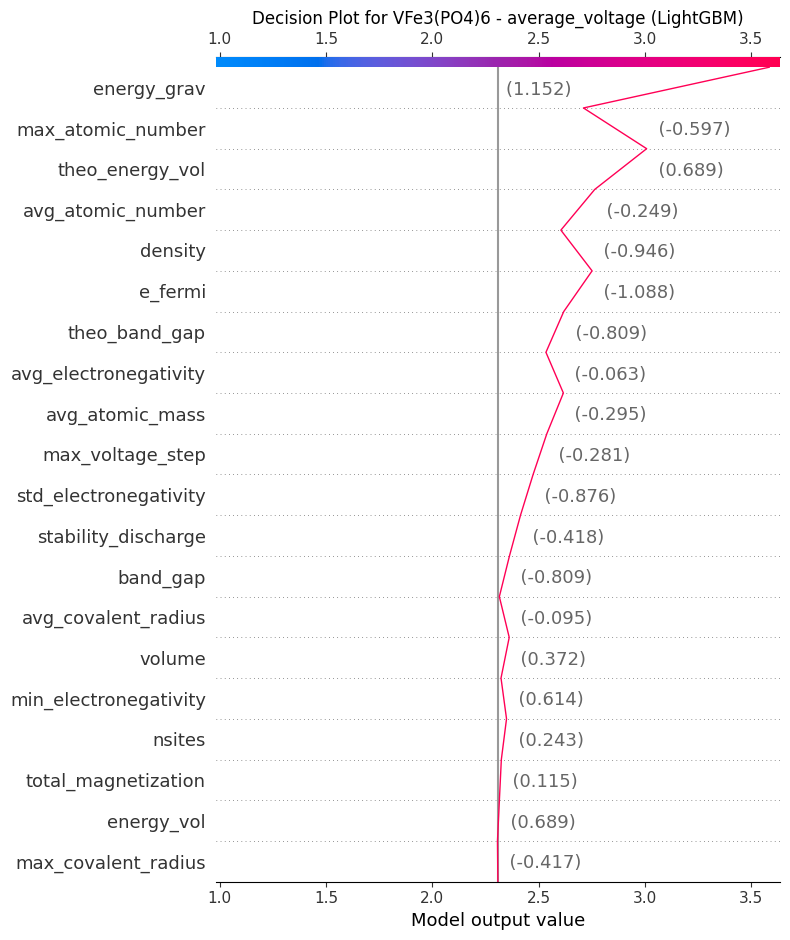


--- Decision Plot for MnP2O7 (Index: 1432) and average_voltage (LightGBM) ---


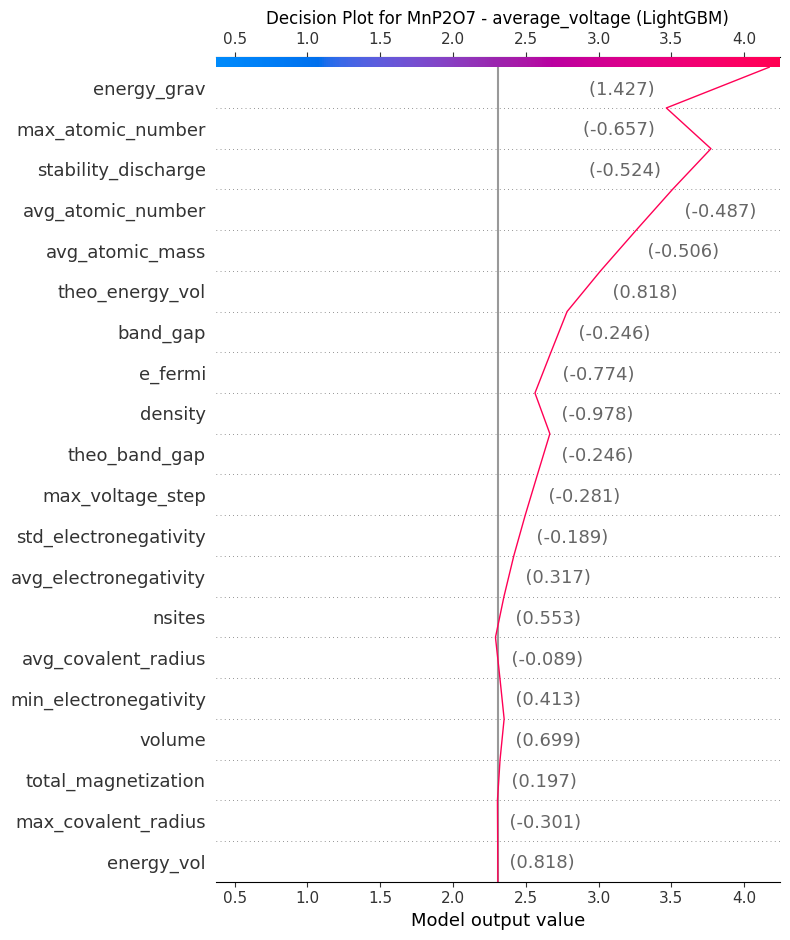


--- Decision Plot for LiV(PO4)2 (Index: 2649) and average_voltage (LightGBM) ---


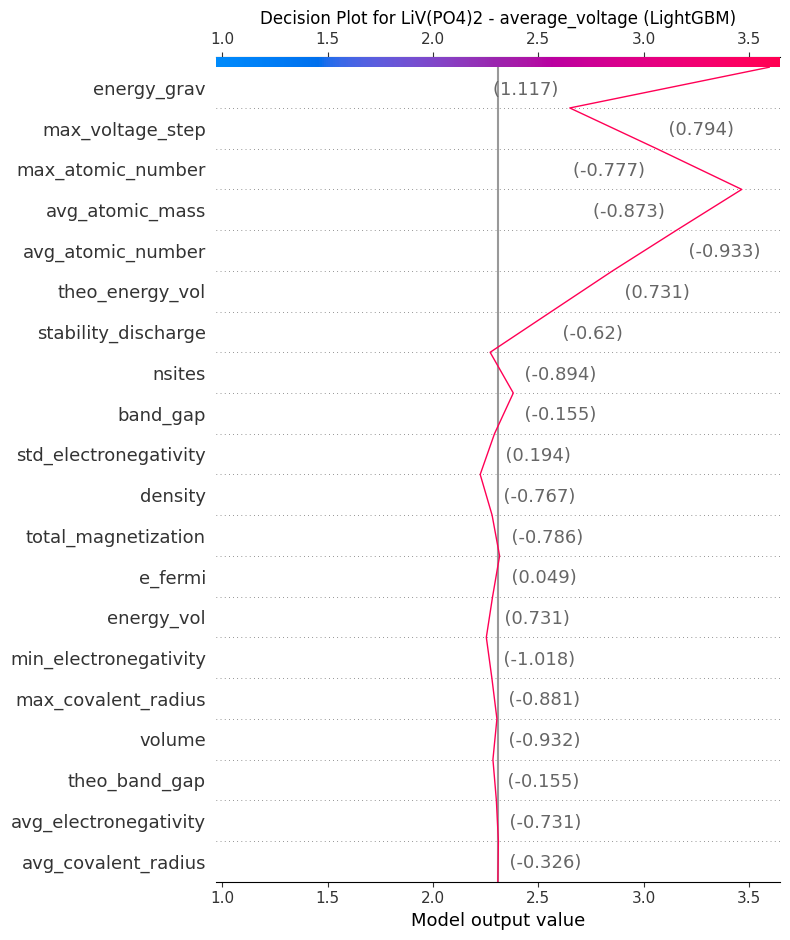


Decision Plots for target KPI: energy_above_hull (LightGBM):

--- Decision Plot for VFe3(PO4)6 (Index: 2970) and energy_above_hull (LightGBM) ---


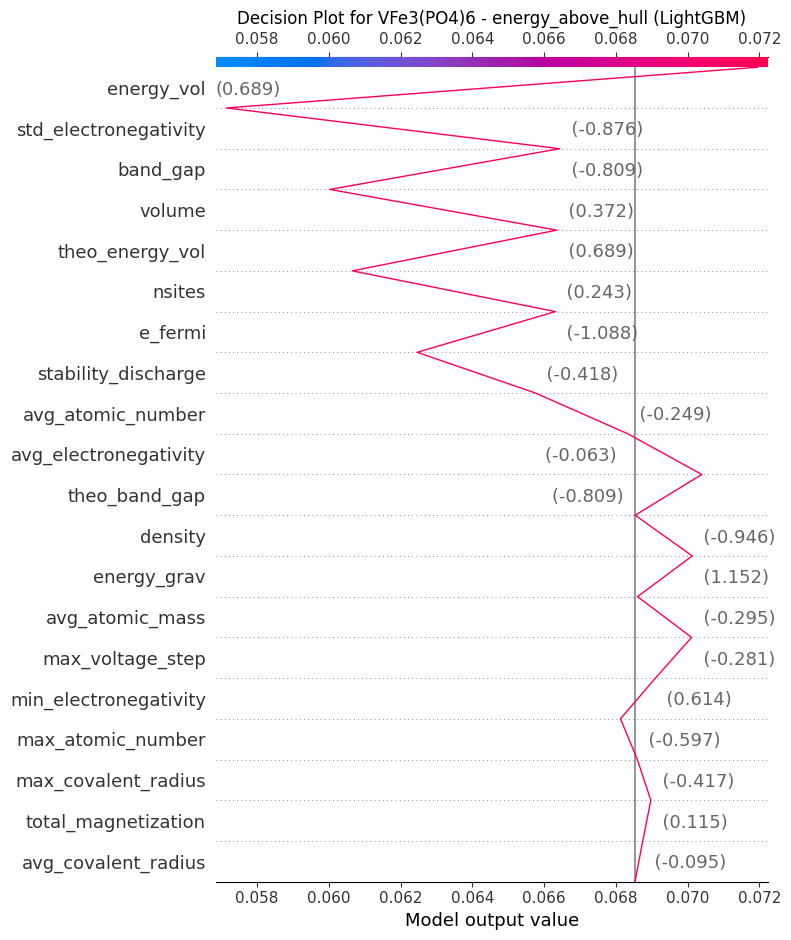


--- Decision Plot for MnP2O7 (Index: 1432) and energy_above_hull (LightGBM) ---


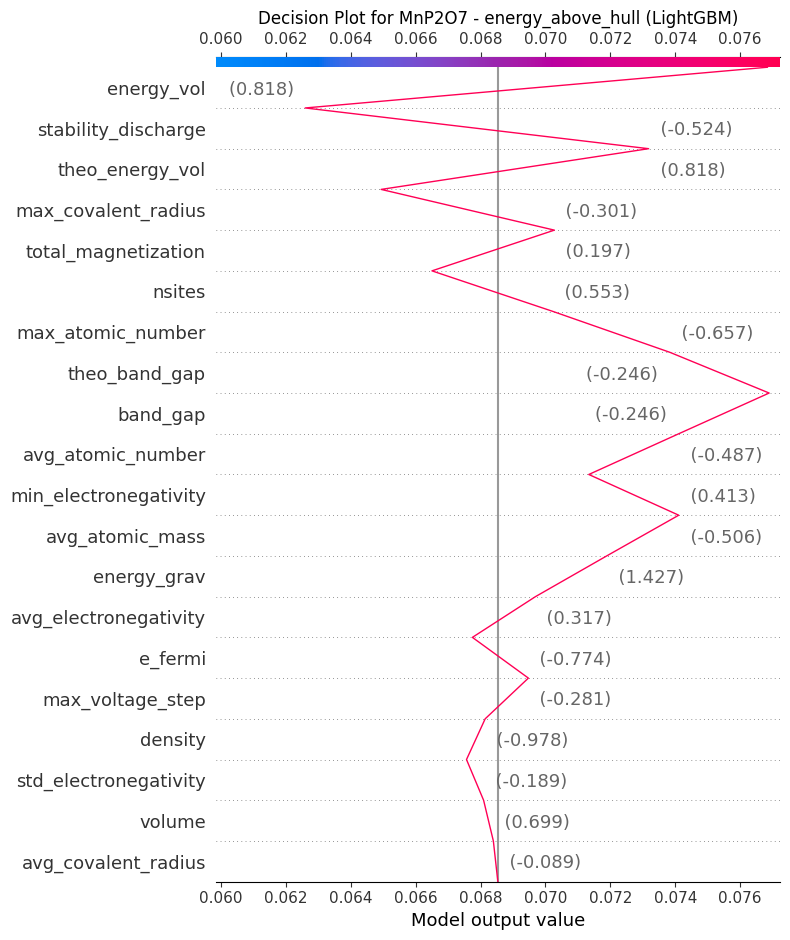


--- Decision Plot for LiV(PO4)2 (Index: 2649) and energy_above_hull (LightGBM) ---


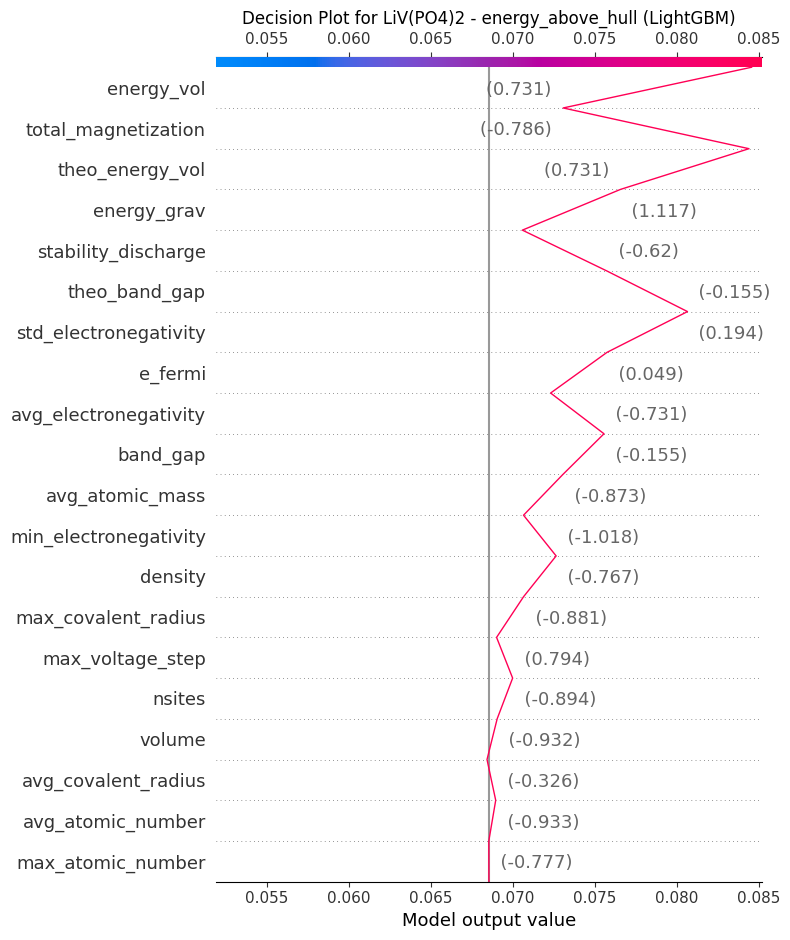

In [ ]:
# Display SHAP Decision plots for LightGBM (one plot per unique material)
print("\n--- Displaying SHAP Decision Plots (LightGBM - One Plot per Material) ---")

if 'shap_values_dict_lgbm' in locals() and 'X_test_shap_lgbm' in locals() and 'model_features_lightgbm' in locals() and 'shap_materials' in locals() and 'loaded_lightgbm_model' in locals() and 'target_kpis' in locals() and 'combined_df_lightgbm' in locals():

    for i, kpi in enumerate(target_kpis):
        print(f"\nDecision Plots for target KPI: {kpi} (LightGBM):")
        shap_values_lgbm = shap_values_dict_lgbm[kpi]
        # Need a new explainer instance for the decision plot which uses the original explainer base_values
        explainer_lgbm_decision = shap.Explainer(loaded_lightgbm_model.estimators_[i], X_test_data_lightgbm[model_features_lightgbm])

        plotted_materials = set() # Keep track of materials for which a plot has been generated

        # Iterate through the indices of X_test_shap_lgbm
        for index, row in X_test_shap_lgbm.iterrows():
             material = combined_df_lightgbm.loc[index, 'formula_pretty']

             # Check if a plot for this material has already been generated
             if material in plotted_materials:
                 continue # Skip to the next iteration


             # Find the corresponding integer index in the shap_values_lgbm
             # This assumes the order of instances in shap_values_lgbm matches X_test_shap_lgbm
             try:
                 j = list(X_test_shap_lgbm.index).index(index) # Get the integer position of the current index
             except ValueError:
                 print(f"Warning: Index {index} not found in X_test_shap_lgbm indices. Skipping this instance.")
                 continue # Skip to the next iteration


             if j < len(shap_values_lgbm.values): # Ensure integer index is within bounds of shap_values' values array
                print(f"\n--- Decision Plot for {material} (Index: {index}) and {kpi} (LightGBM) ---")

                # SHAP Decision Plot for LightGBM
                try:
                    shap.decision_plot(explainer_lgbm_decision.expected_value[j] if isinstance(explainer_lgbm_decision.expected_value, list) else explainer_lgbm_decision.expected_value,
                                             shap_values_lgbm.values[j],
                                             row, # Pass the feature values for the current row (which is already a Series)
                                             feature_names=model_features_lightgbm,
                                             show=False) # Use show=False to manage plot display with plt.show()
                    plt.title(f"Decision Plot for {material} - {kpi} (LightGBM)")
                    plt.tight_layout()
                    plt.show()
                    plotted_materials.add(material) # Add the material to the set after plotting

                except Exception as e:
                    print(f"Error generating decision plot for {material} (Index: {index}) and {kpi} (LightGBM): {e}")
                    # Print a more specific message if the issue persists
                    print("Possible issue with data or SHAP value alignment for this instance.")


             else:
                print(f"Warning: Could not generate decision plot for {material} (Index: {index}) for {kpi} (LightGBM). Integer index {j} out of bounds for SHAP values.")

else:
    print("Required data (combined_results, X_test_loaded_dfs_sf, loaded_lightgbm_model) for LightGBM SHAP analysis not available. Please run the previous cells.")